In [ ]:
import os
import glob
import cv2
import random
import numpy as np
from PIL import Image
from keras.utils import normalize
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_directory = '/content/drive/MyDrive/cell-data/my-dataset-2/cells/image'
mask_directory = '/content/drive/MyDrive/cell-data/my-dataset-2/cells/mask'


In [ ]:
SIZE = 512
image_dataset = []
mask_dataset = []


In [ ]:
# Remove .DS_Store
images = os.listdir(image_directory)
images = [file for file in images if file != ".DS_Store"]
masks = os.listdir(mask_directory)
masks = [file for file in masks if file != ".DS_Store"]

In [ ]:
images.sort()

masks.sort()
print("images" , images)
print("masks" , masks)

images ['img1.tif', 'img10.tif', 'img100.tif', 'img101.tif', 'img102.tif', 'img103.tif', 'img104.tif', 'img105.tif', 'img106.tif', 'img107.tif', 'img108.tif', 'img109.tif', 'img11.tif', 'img110.tif', 'img111.tif', 'img112.tif', 'img113.tif', 'img114.tif', 'img115.tif', 'img116.tif', 'img117.tif', 'img118.tif', 'img119.tif', 'img12.tif', 'img120.tif', 'img121.tif', 'img122.tif', 'img123.tif', 'img124.tif', 'img125.tif', 'img126.tif', 'img127.tif', 'img128.tif', 'img129.tif', 'img13.tif', 'img130.tif', 'img131.tif', 'img132.tif', 'img133.tif', 'img134.tif', 'img135.tif', 'img136.tif', 'img137.tif', 'img138.tif', 'img139.tif', 'img14.tif', 'img140.tif', 'img141.tif', 'img142.tif', 'img143.tif', 'img144.tif', 'img145.tif', 'img146.tif', 'img147.tif', 'img148.tif', 'img149.tif', 'img15.tif', 'img150.tif', 'img151.tif', 'img152.tif', 'img153.tif', 'img154.tif', 'img155.tif', 'img156.tif', 'img157.tif', 'img158.tif', 'img159.tif', 'img16.tif', 'img160.tif', 'img161.tif', 'img162.tif', 'img163

In [ ]:
# For each of the items in the list,
  # 1. Convert it to the pillow object and resize it.
  # 2. Then, convert it back to numpy array and append to the image_dataset
for i, image_name in enumerate(images):
    if (image_name.split('.')[1] == 'tif'):
        image = cv2.imread(image_directory+"/"+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image_dataset.append(np.array(image))

for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'tif'):
        image = cv2.imread(mask_directory+"/" + image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        mask_dataset.append(np.array(image))

#Normalize images
image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.
print(image_dataset.shape, mask_dataset.shape)

(313, 512, 512, 1) (313, 512, 512, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.50, random_state = 0)
print(len(X_train))
print(len(X_val))
print(len(y_val))
print(X_train.shape, y_test.shape, X_val.shape)
print(type(X_train))

250
31
31
(250, 512, 512, 1) (32, 512, 512, 1) (31, 512, 512, 1)
<class 'numpy.ndarray'>


In [ ]:
def show_images_batch(X_train, y_train, index):
  plt.figure(figsize=(30,30))
  x, y = 5, 5

  if index == 0 :
    count = 1
  else :
    count = index * 25

  for i in range(y):
      for j in range(x):
          # if idx >= len(X_train):
          #       break

          plt.subplot(y*2, x, i*2*x+j+1)
          pos = i*j+(25*index)
          plt.imshow(np.squeeze(X_train[pos]), cmap='gray')
          plt.title('Image {}'.format(count))
          plt.axis('off')
          plt.subplot(y*2, x, (i*2+1)*x+j+1)
          plt.imshow(np.squeeze(y_train[pos]), cmap='gray')
          plt.title('Mask {}'.format(count))
          plt.axis('off')
          count = count + 1
  plt.show()

  plt.close()

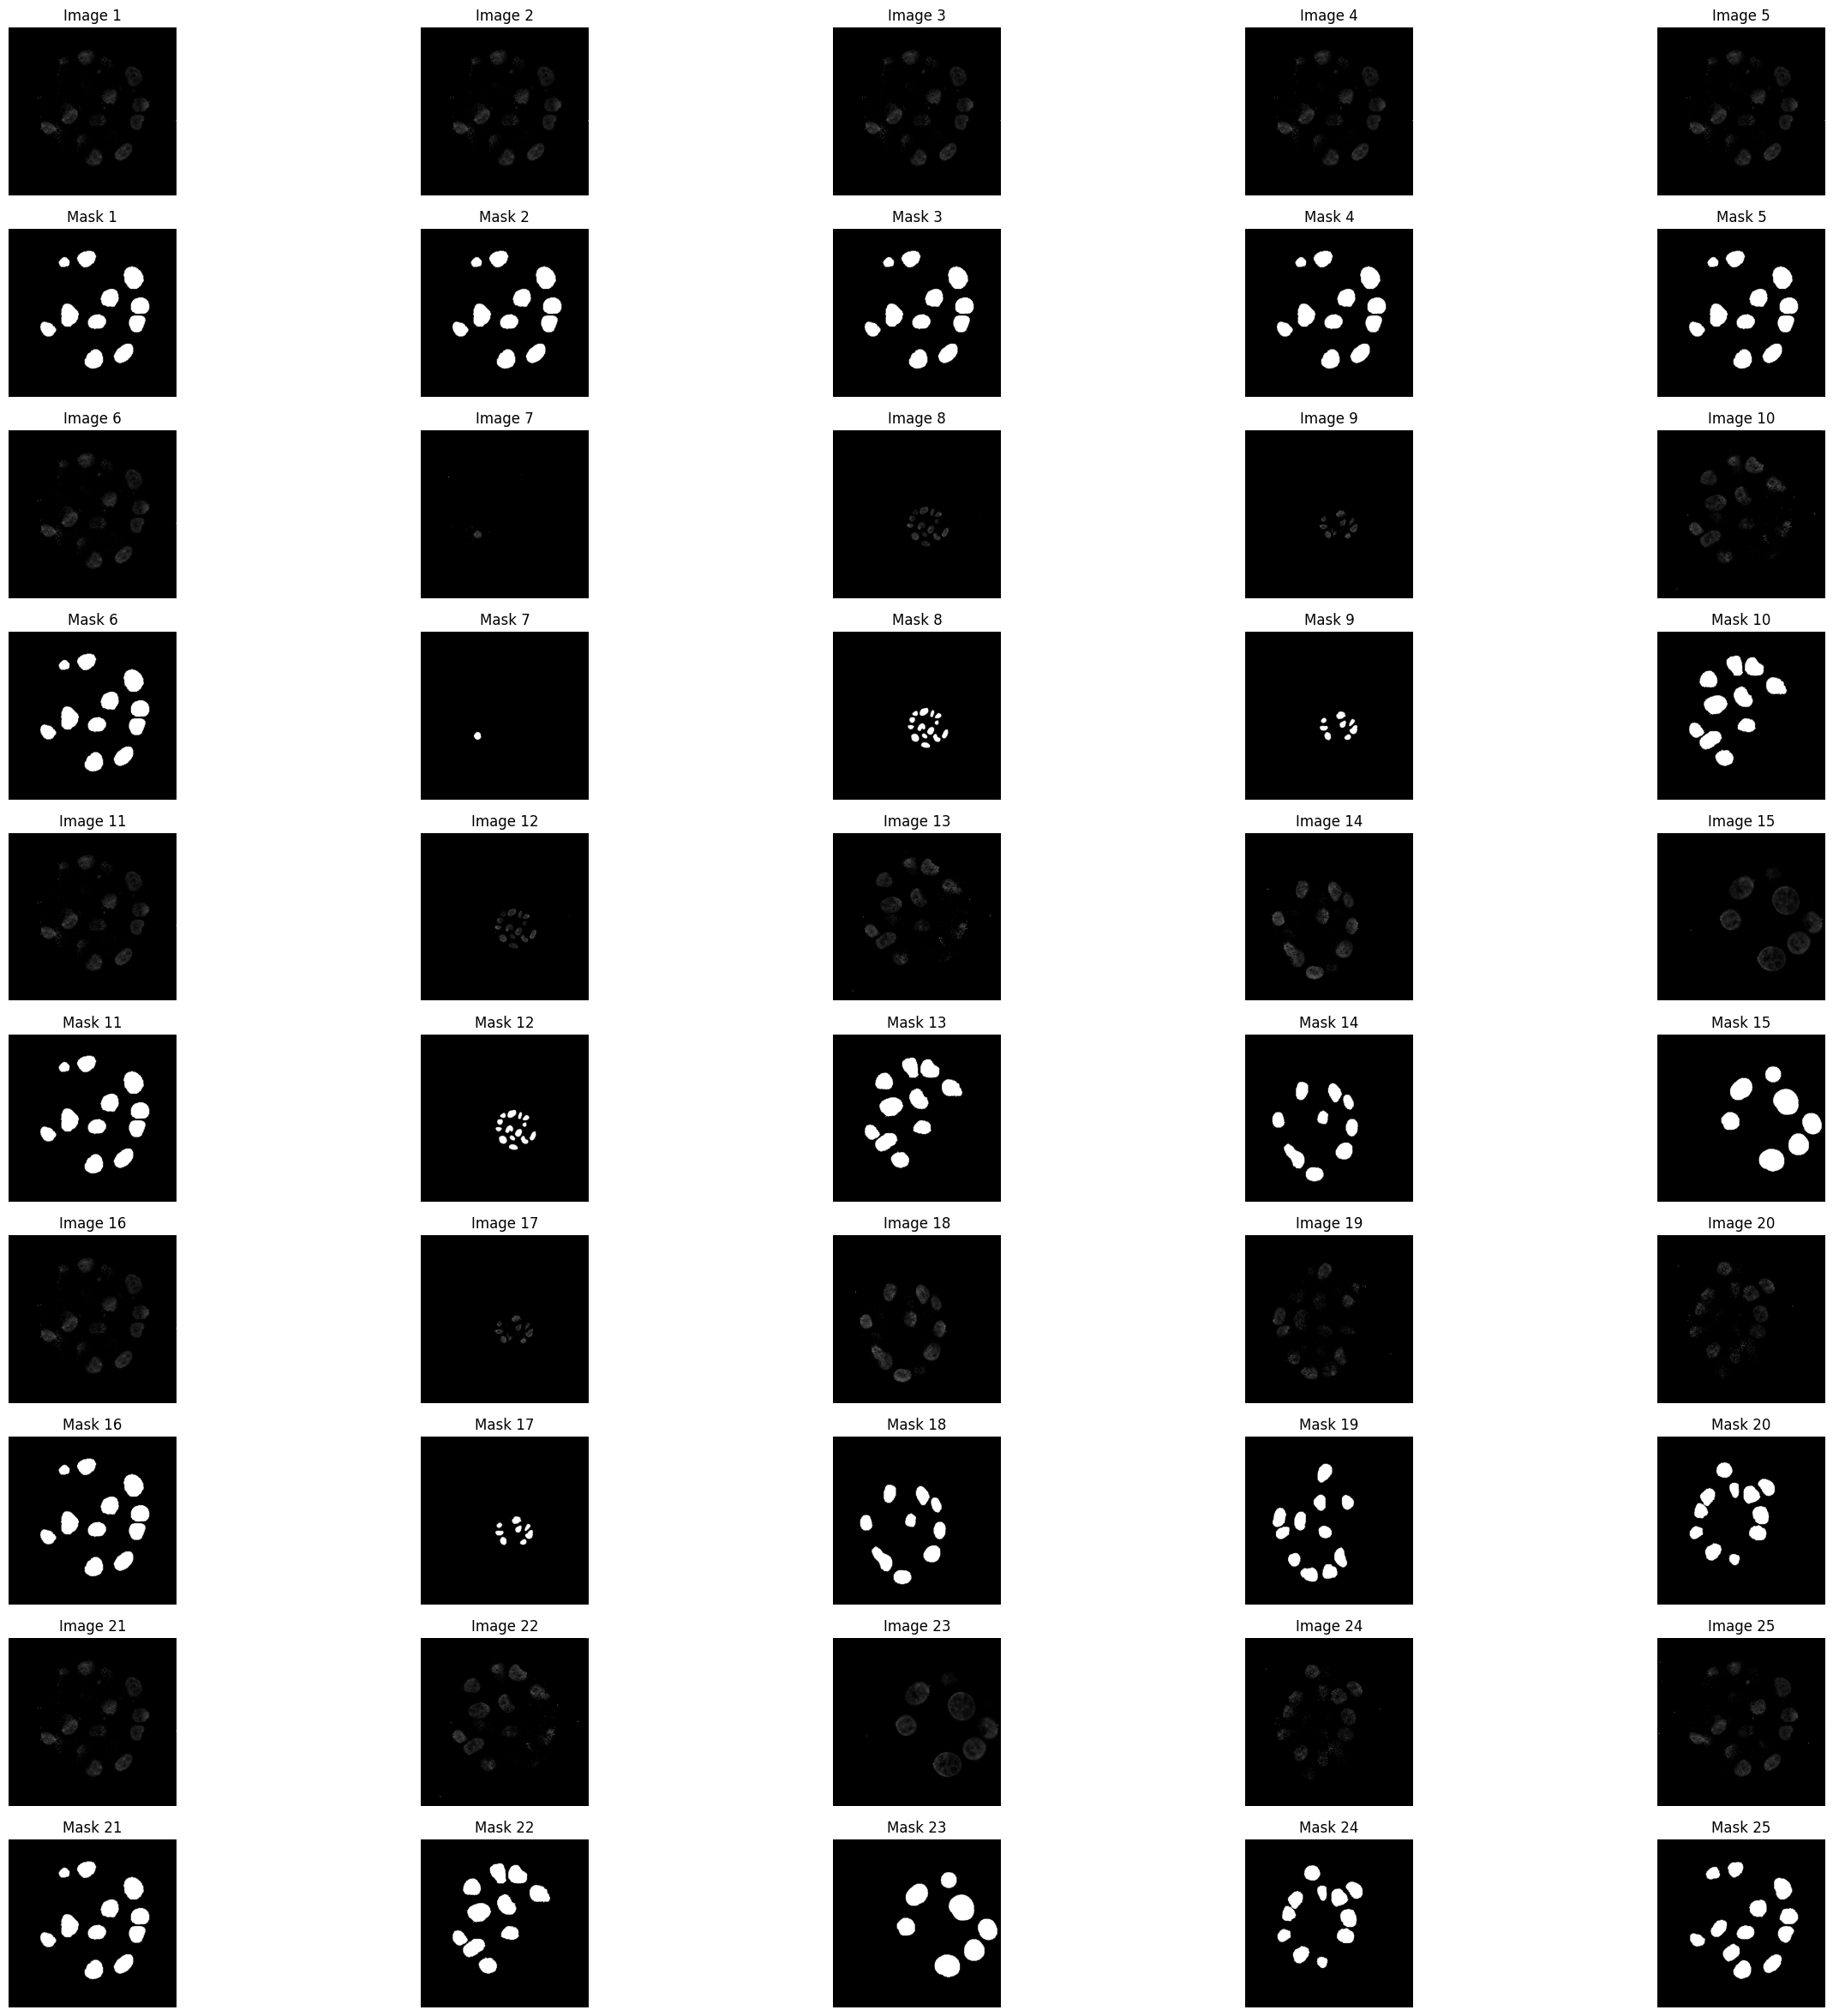

In [ ]:
show_images_batch(X_train, y_train, 0) # 1 to 25

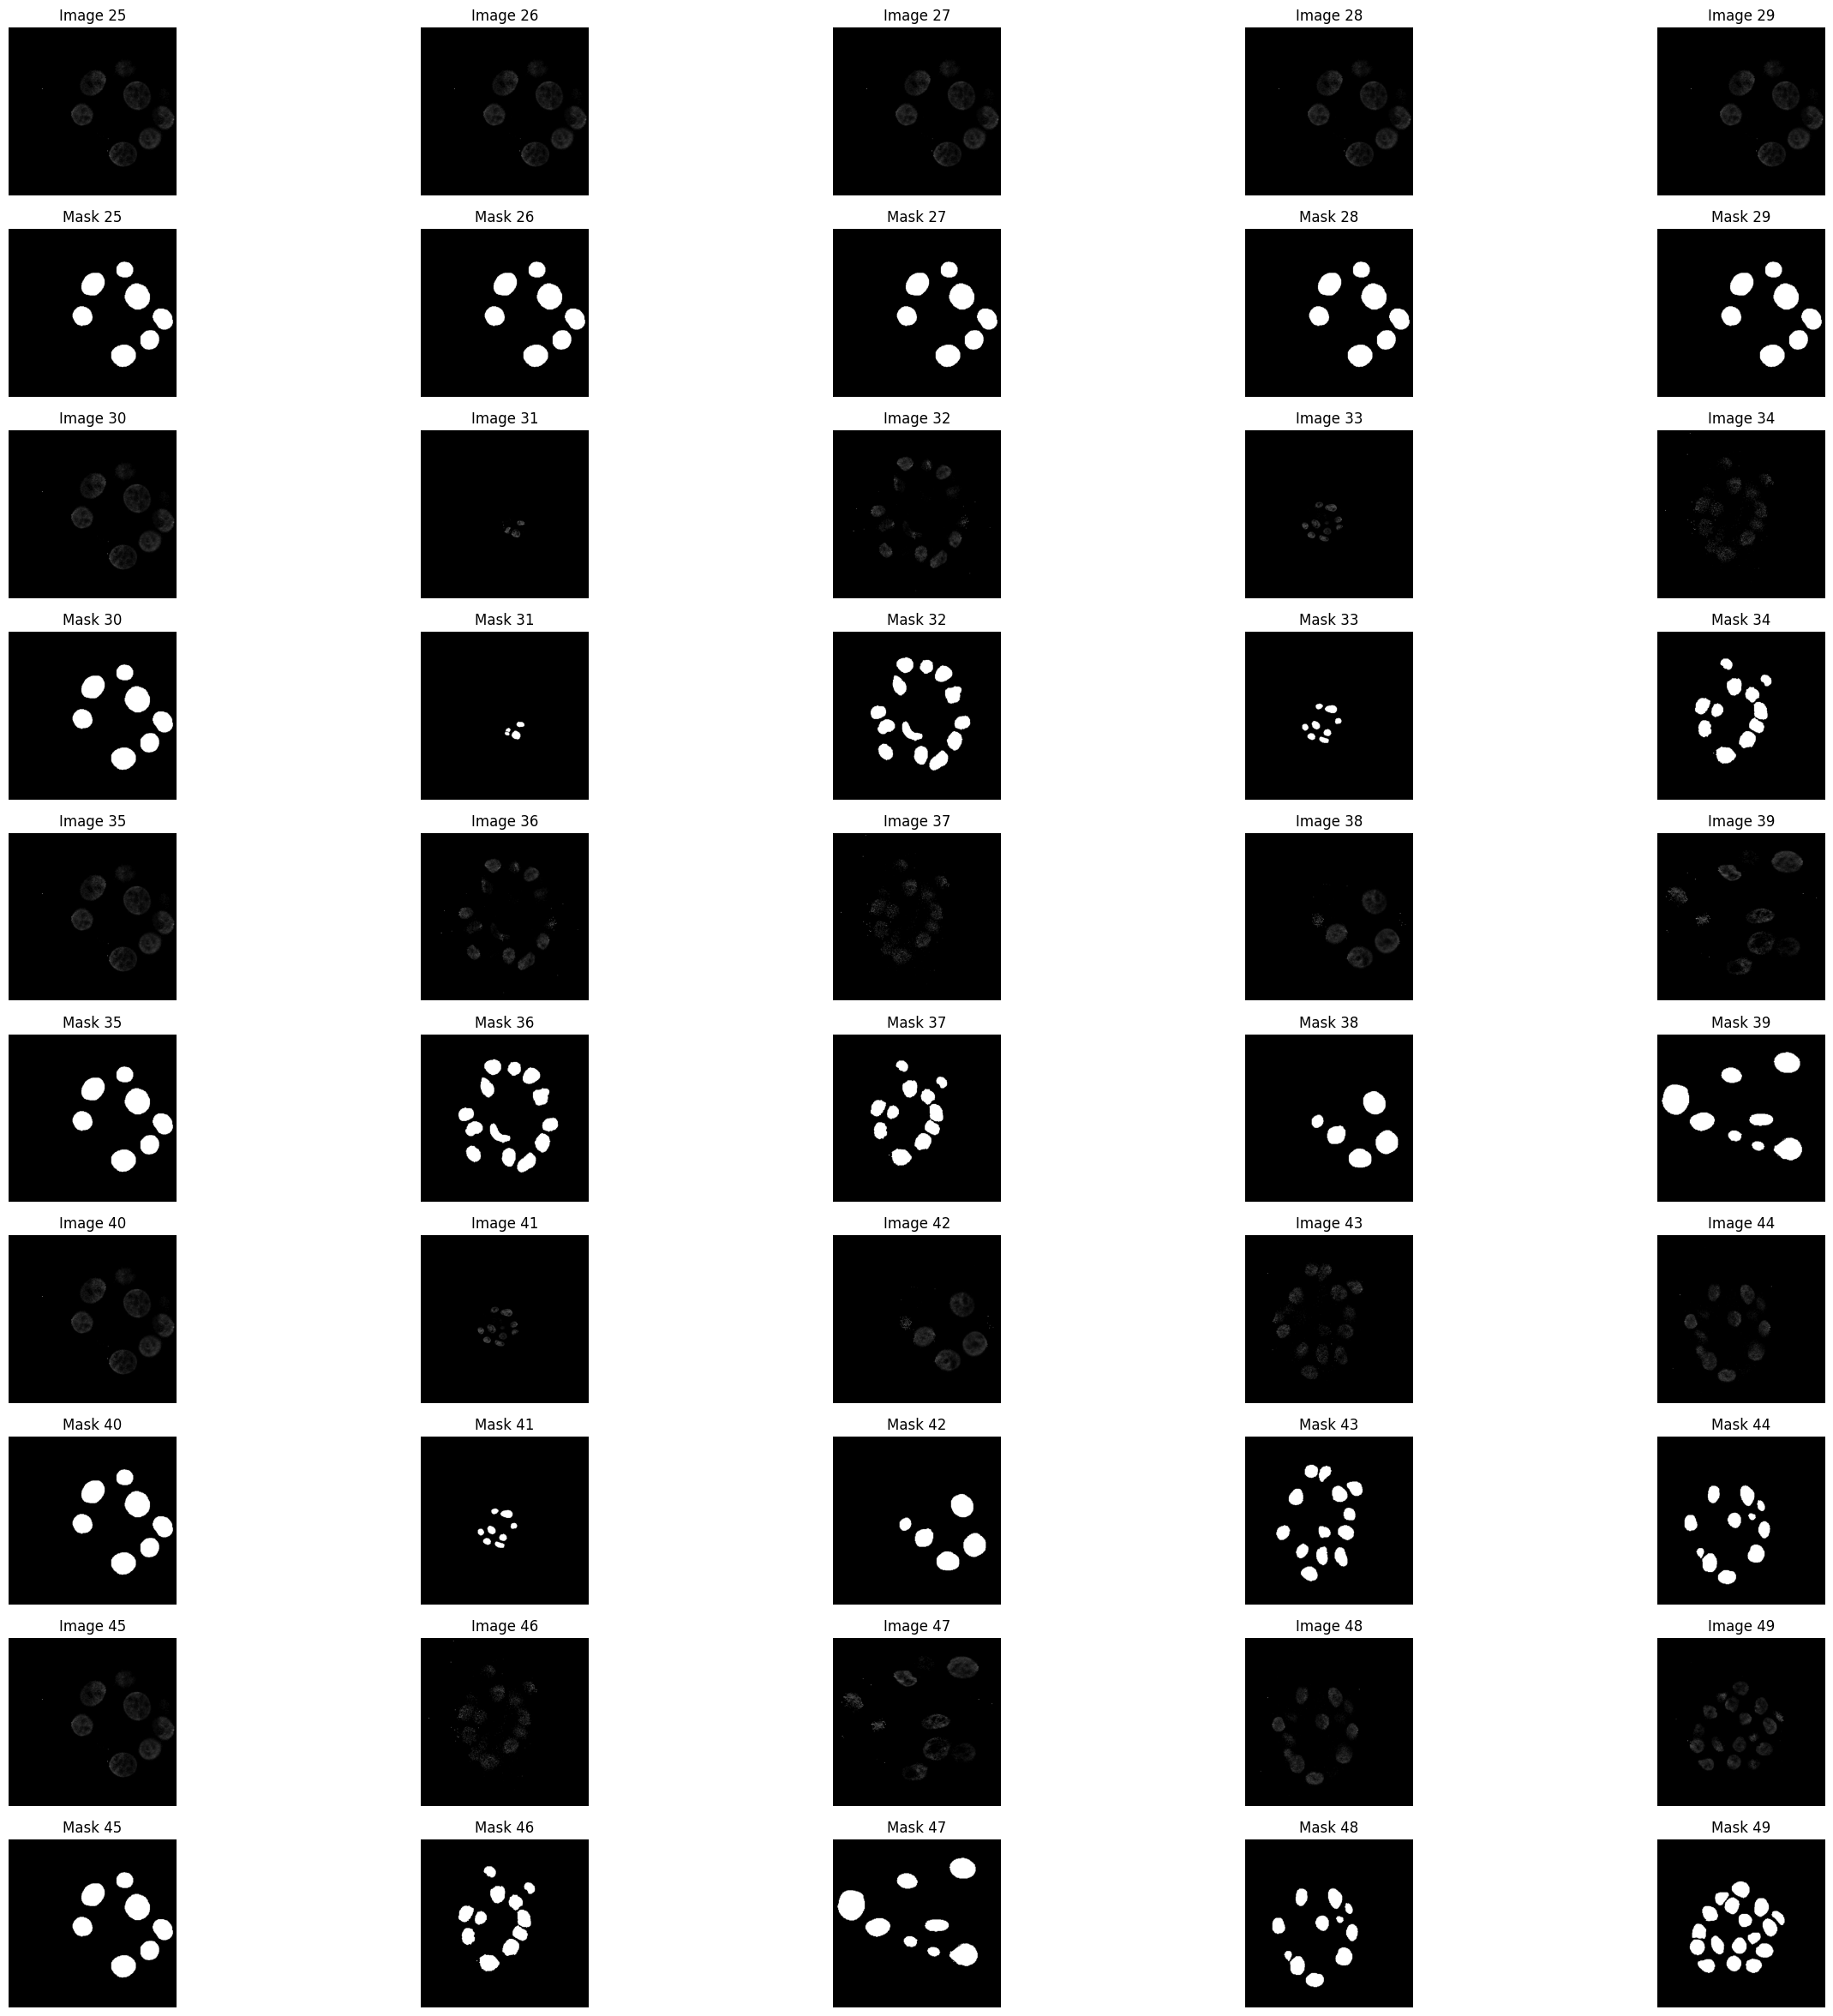

In [ ]:
show_images_batch(X_train, y_train, 1) # 25 to 49

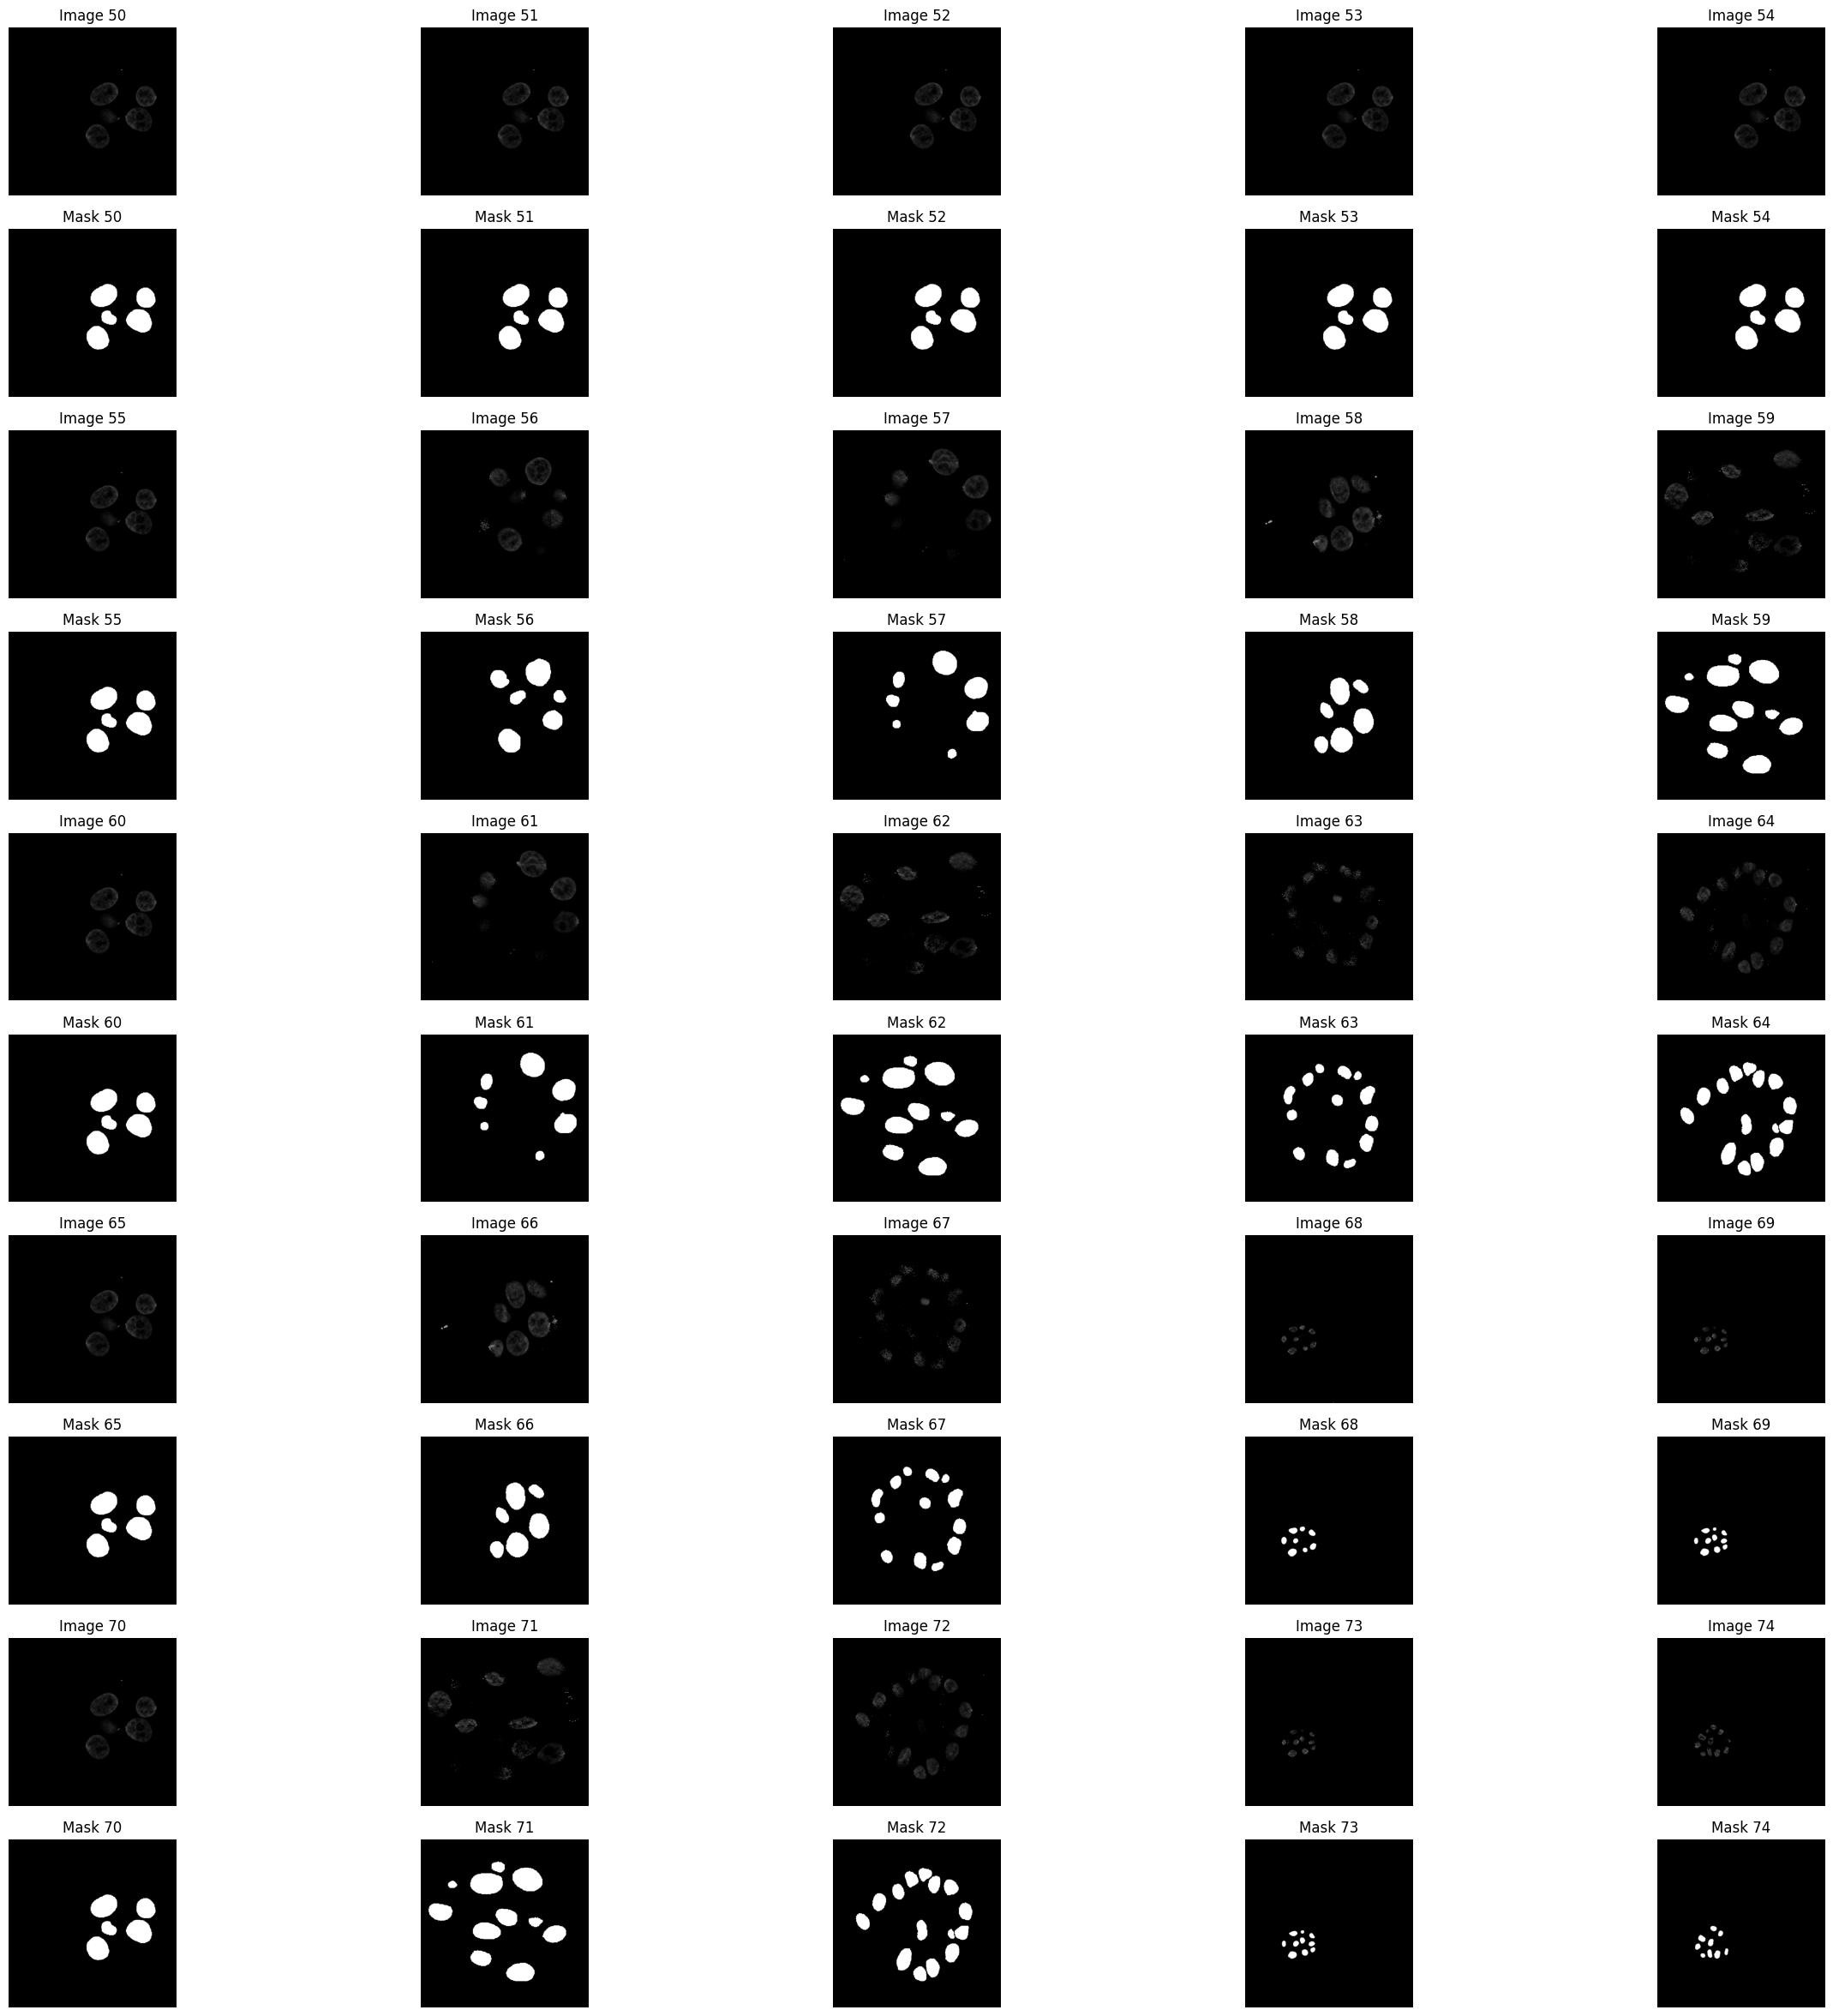

In [ ]:
show_images_batch(X_train, y_train, 2) # 50 - 74

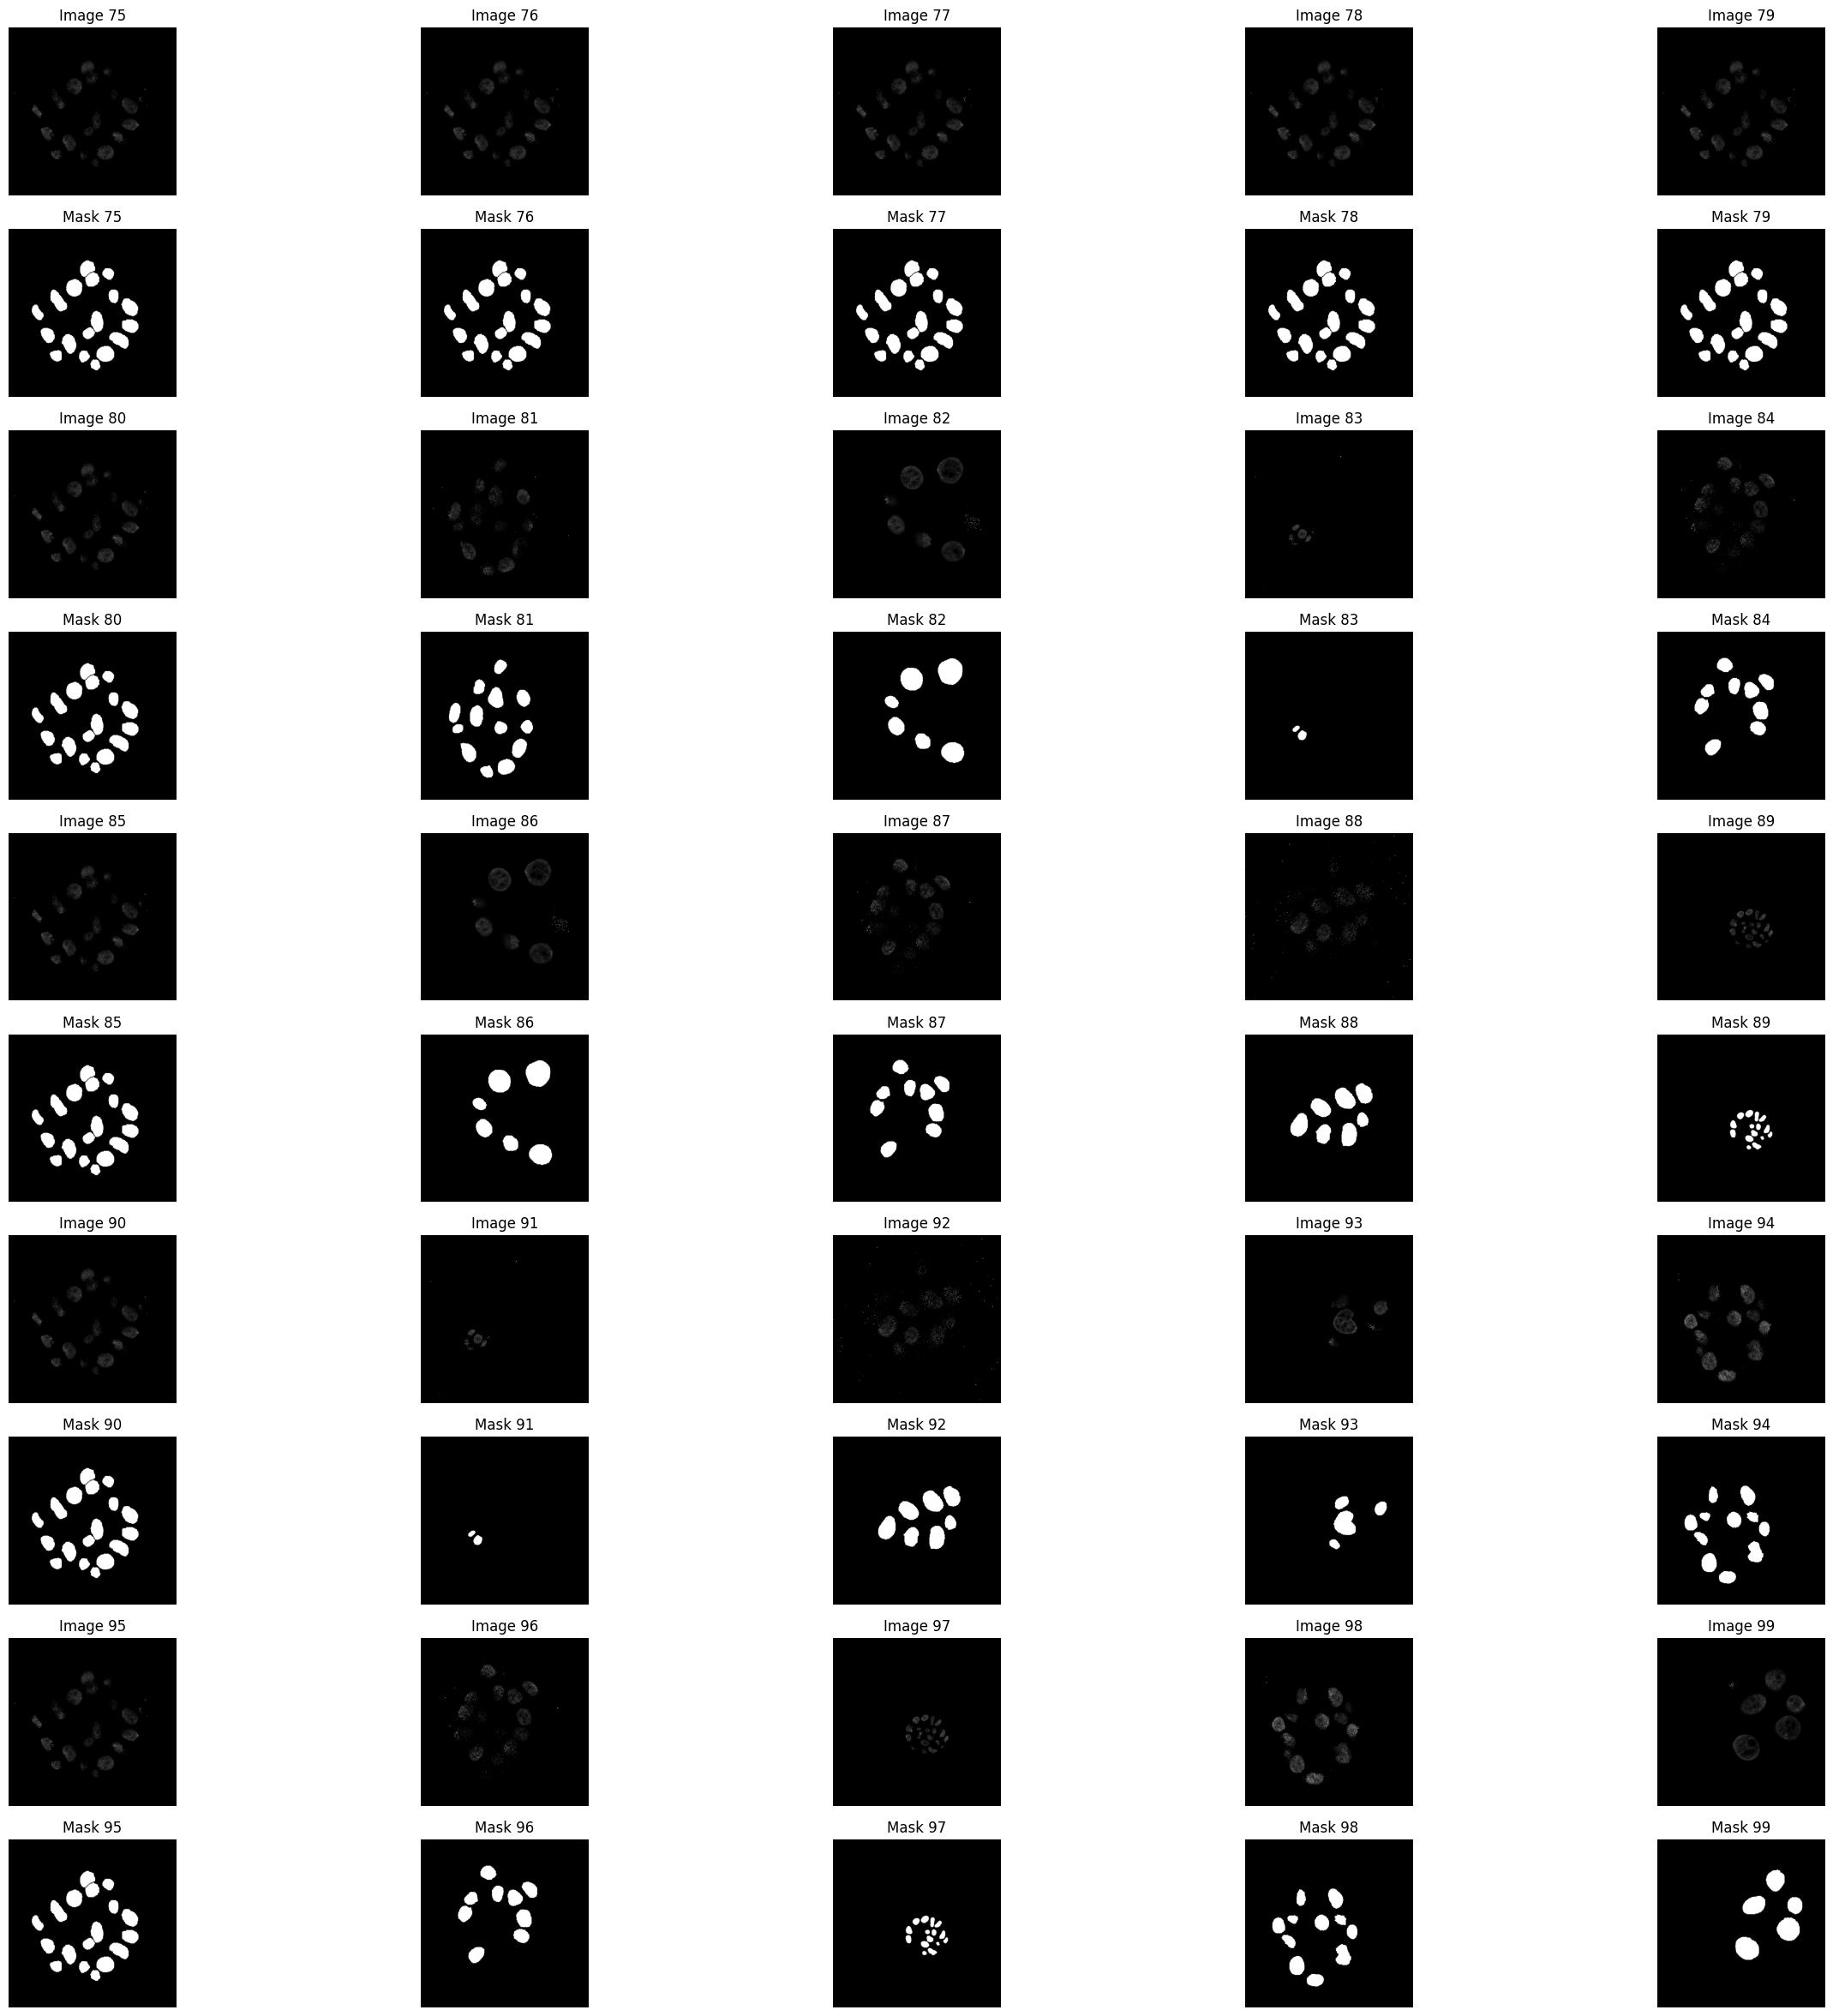

In [ ]:
show_images_batch(X_train, y_train, 3) # 75 - 99

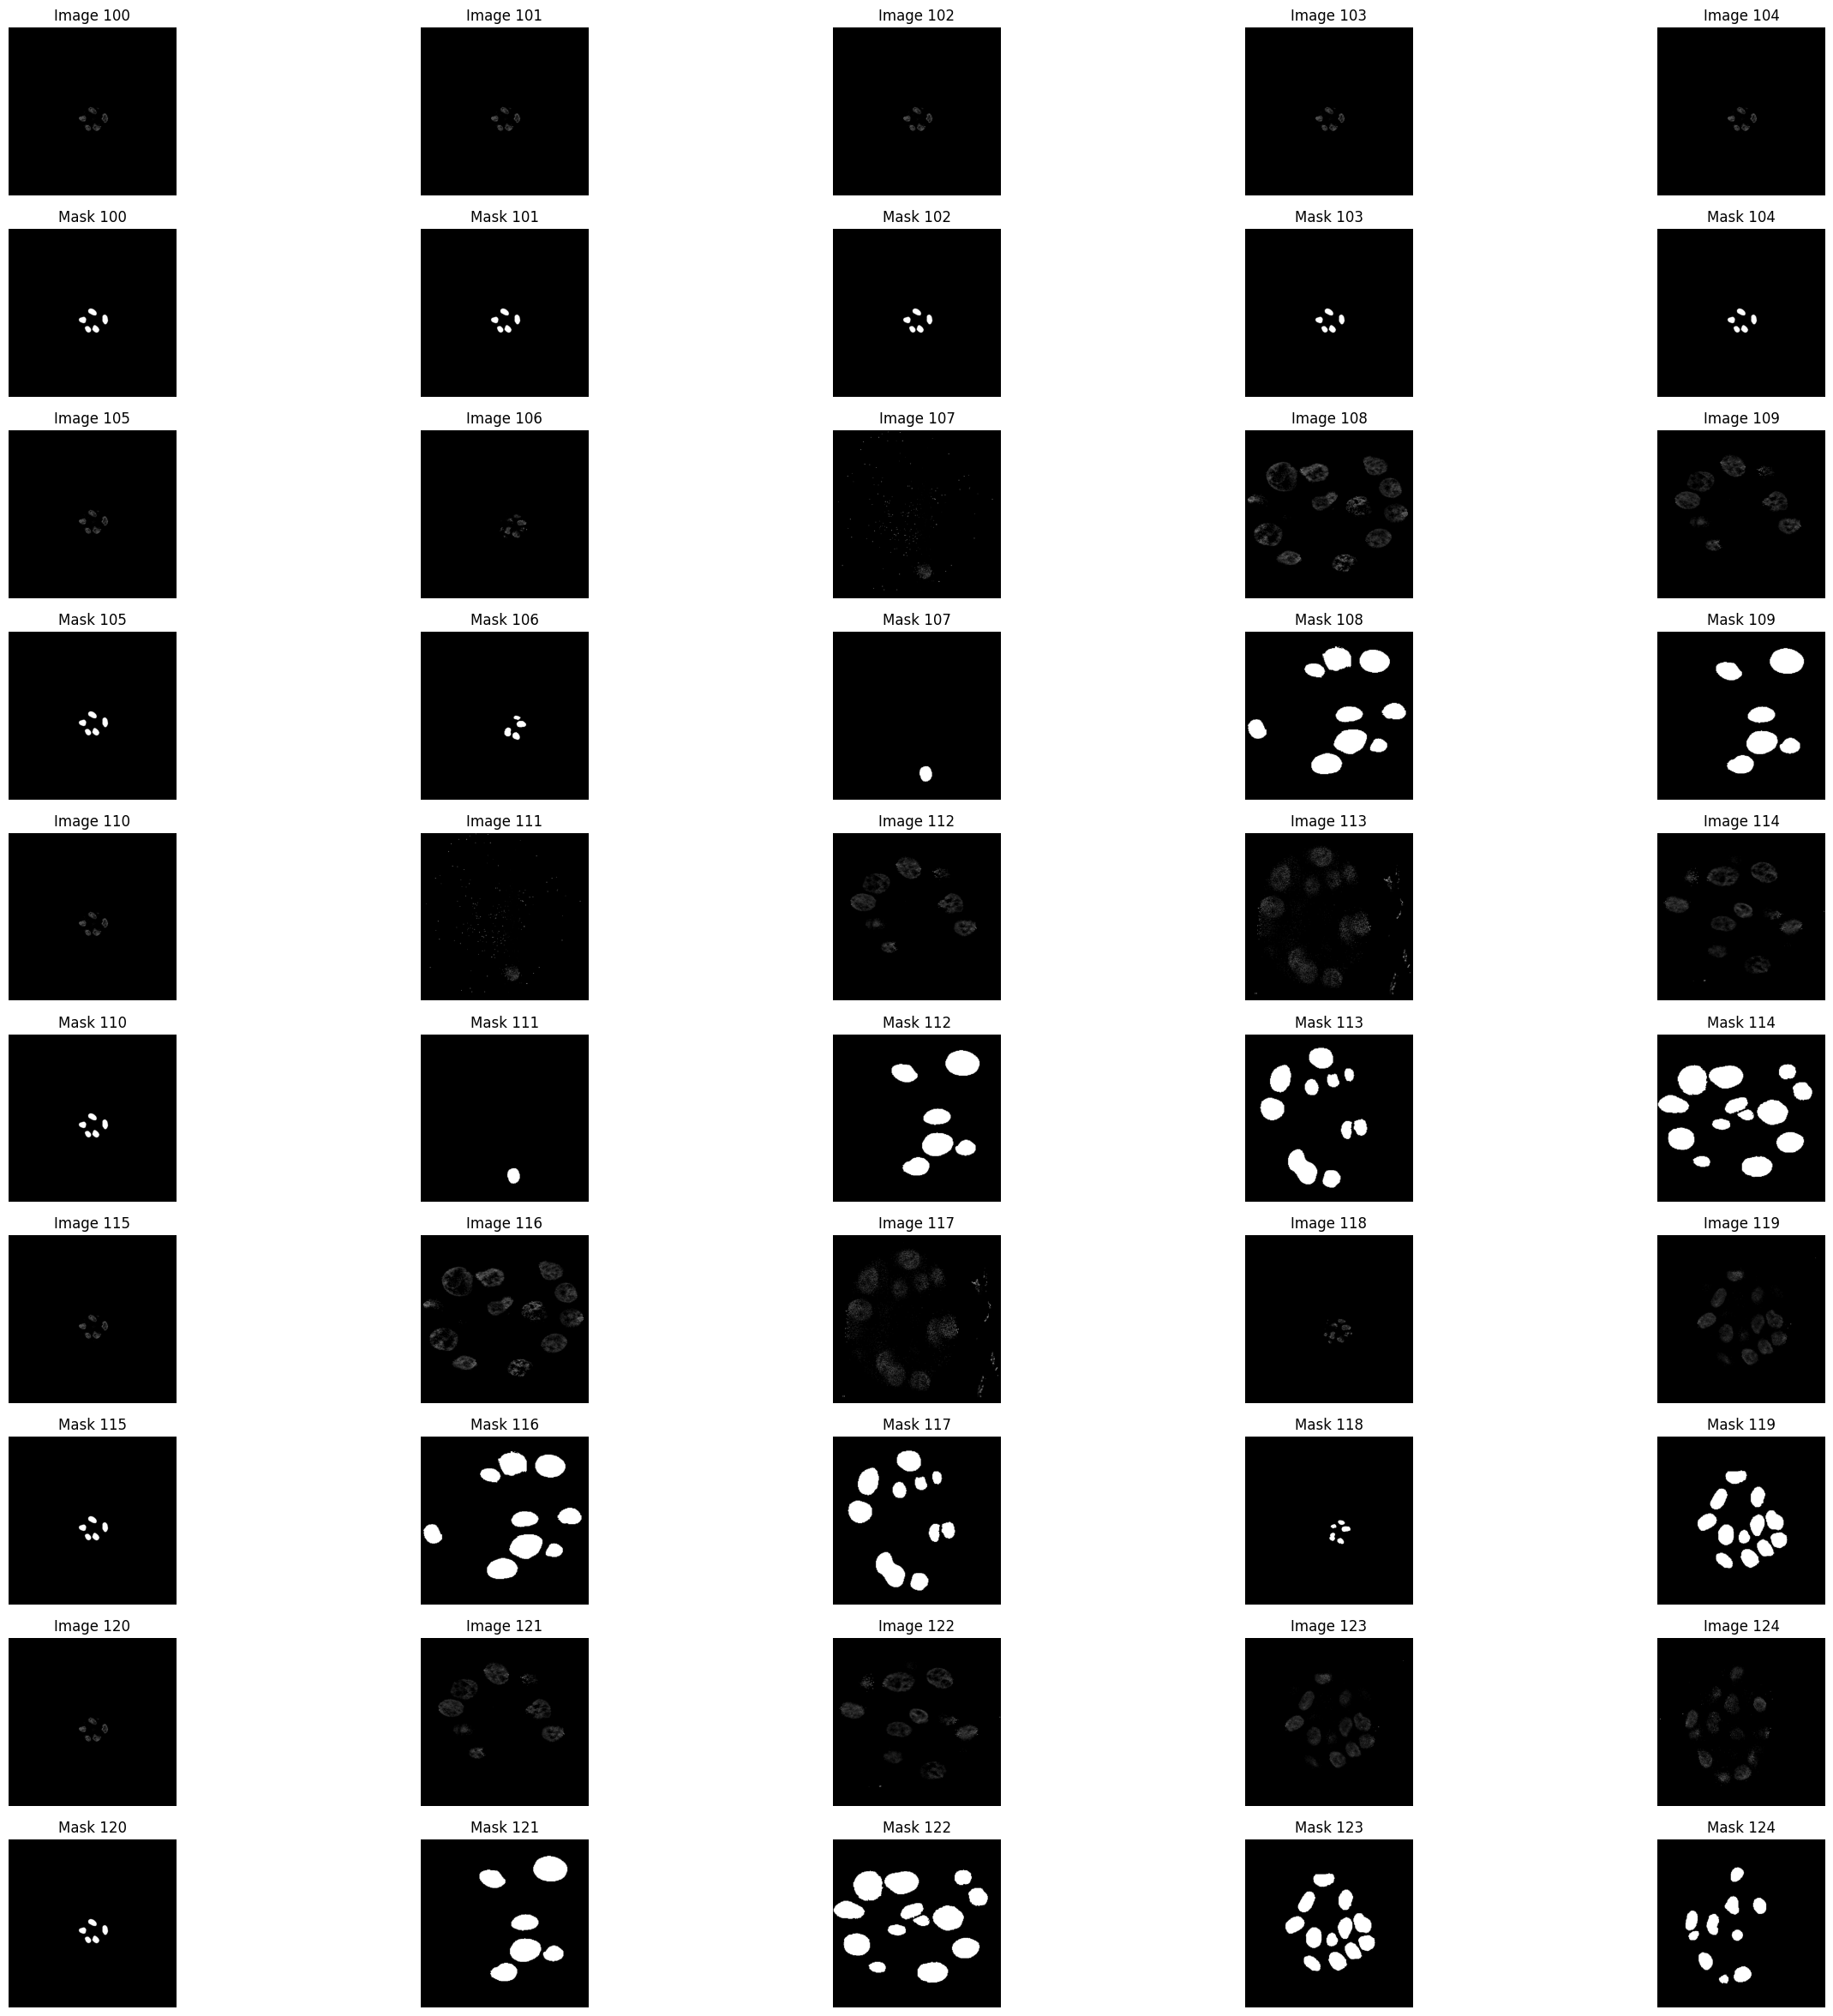

In [ ]:
show_images_batch(X_train, y_train, 4) # 100 - 124

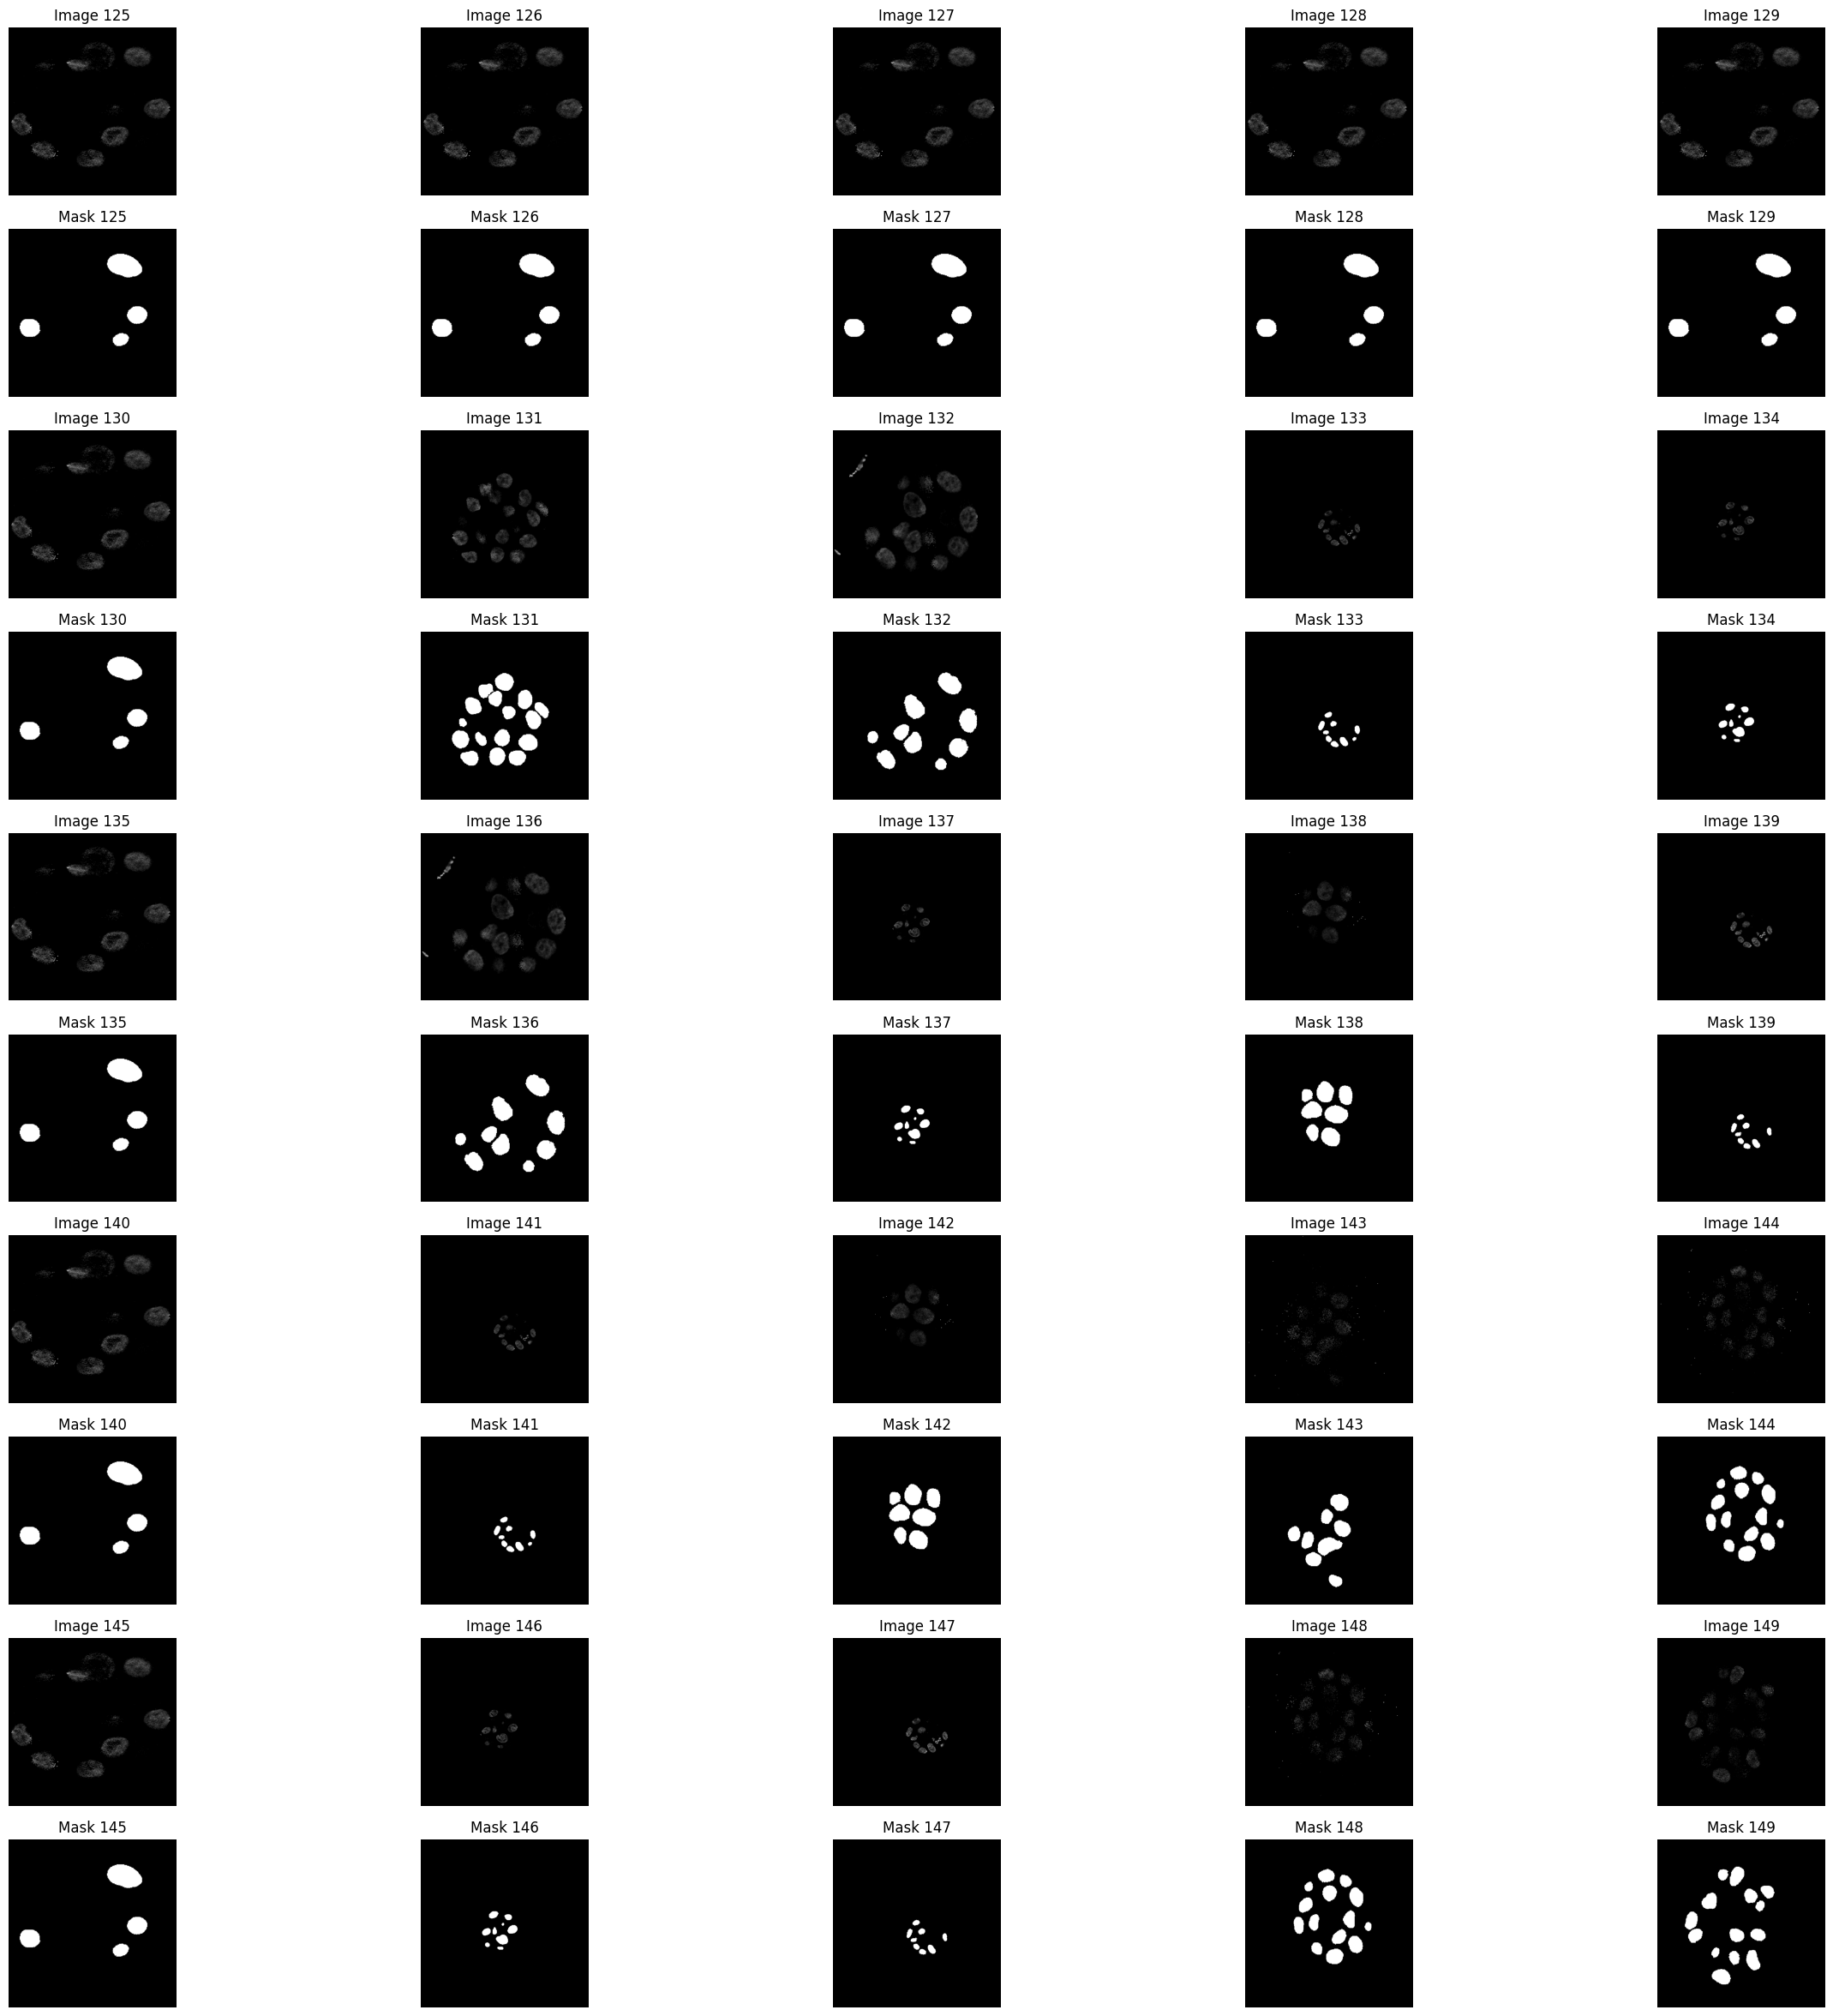

In [ ]:
show_images_batch(X_train, y_train, 5) # 125 - 149

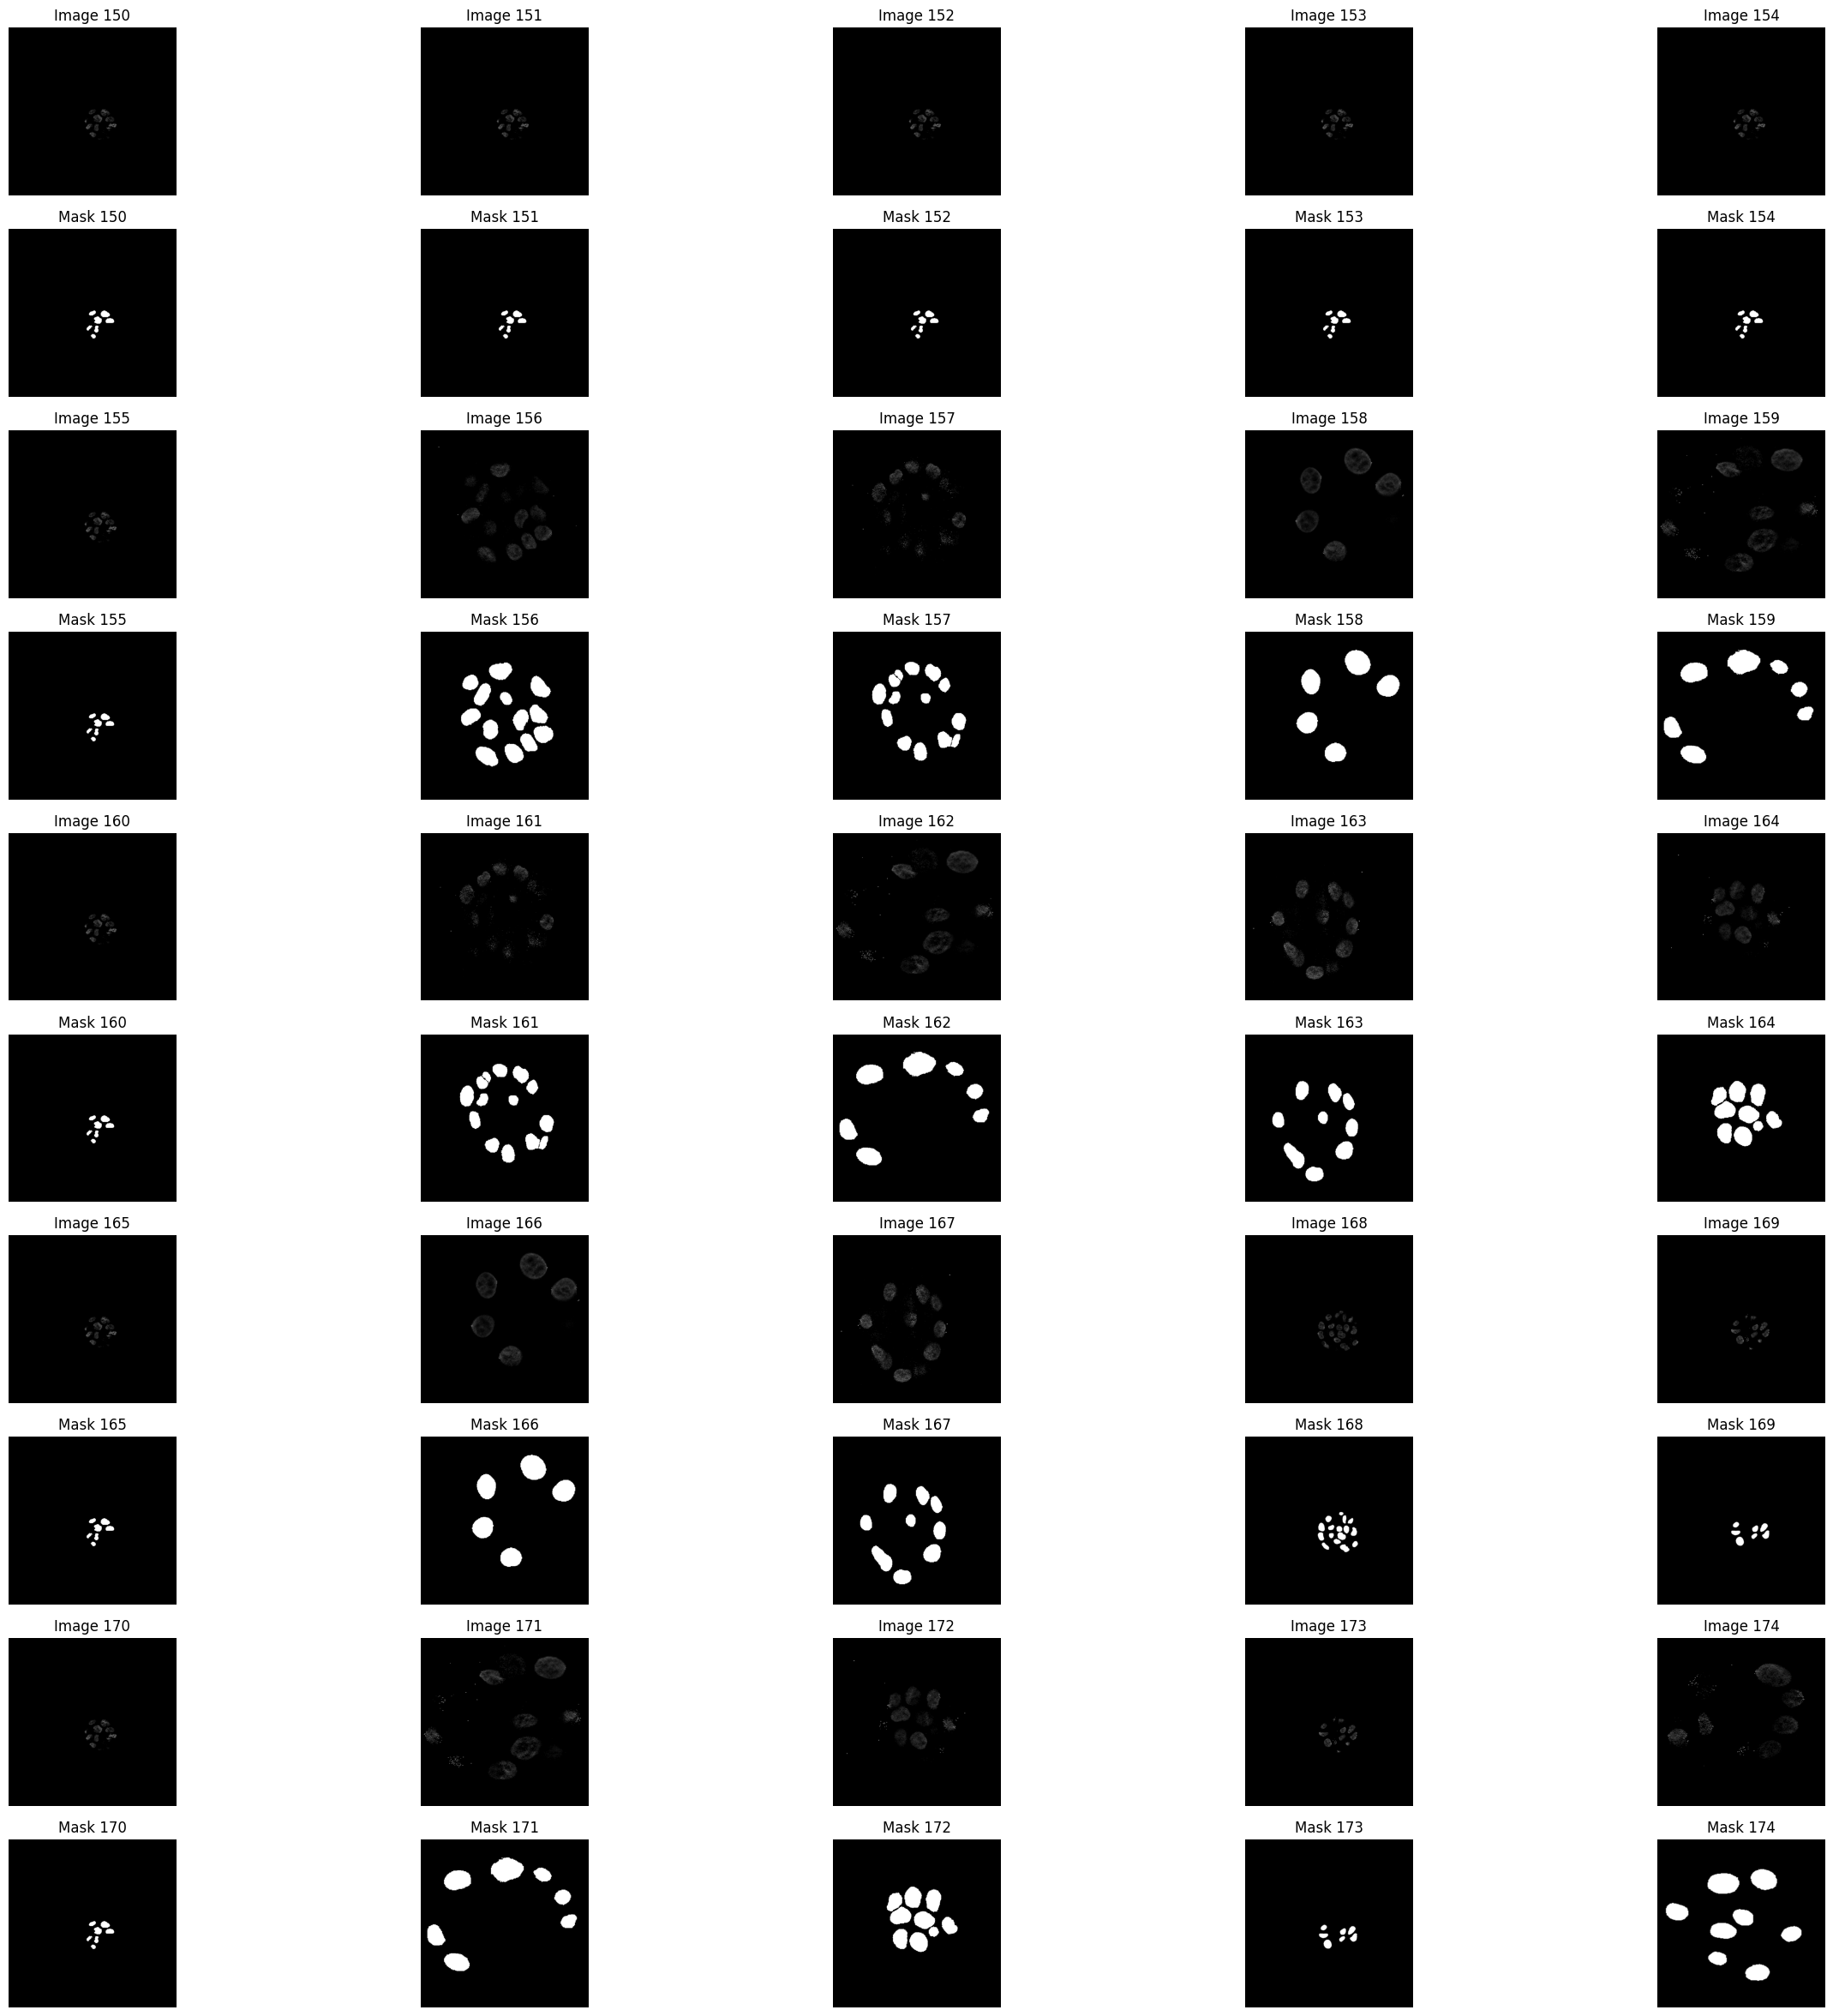

In [ ]:
show_images_batch(X_train, y_train, 6) # 150 - 174

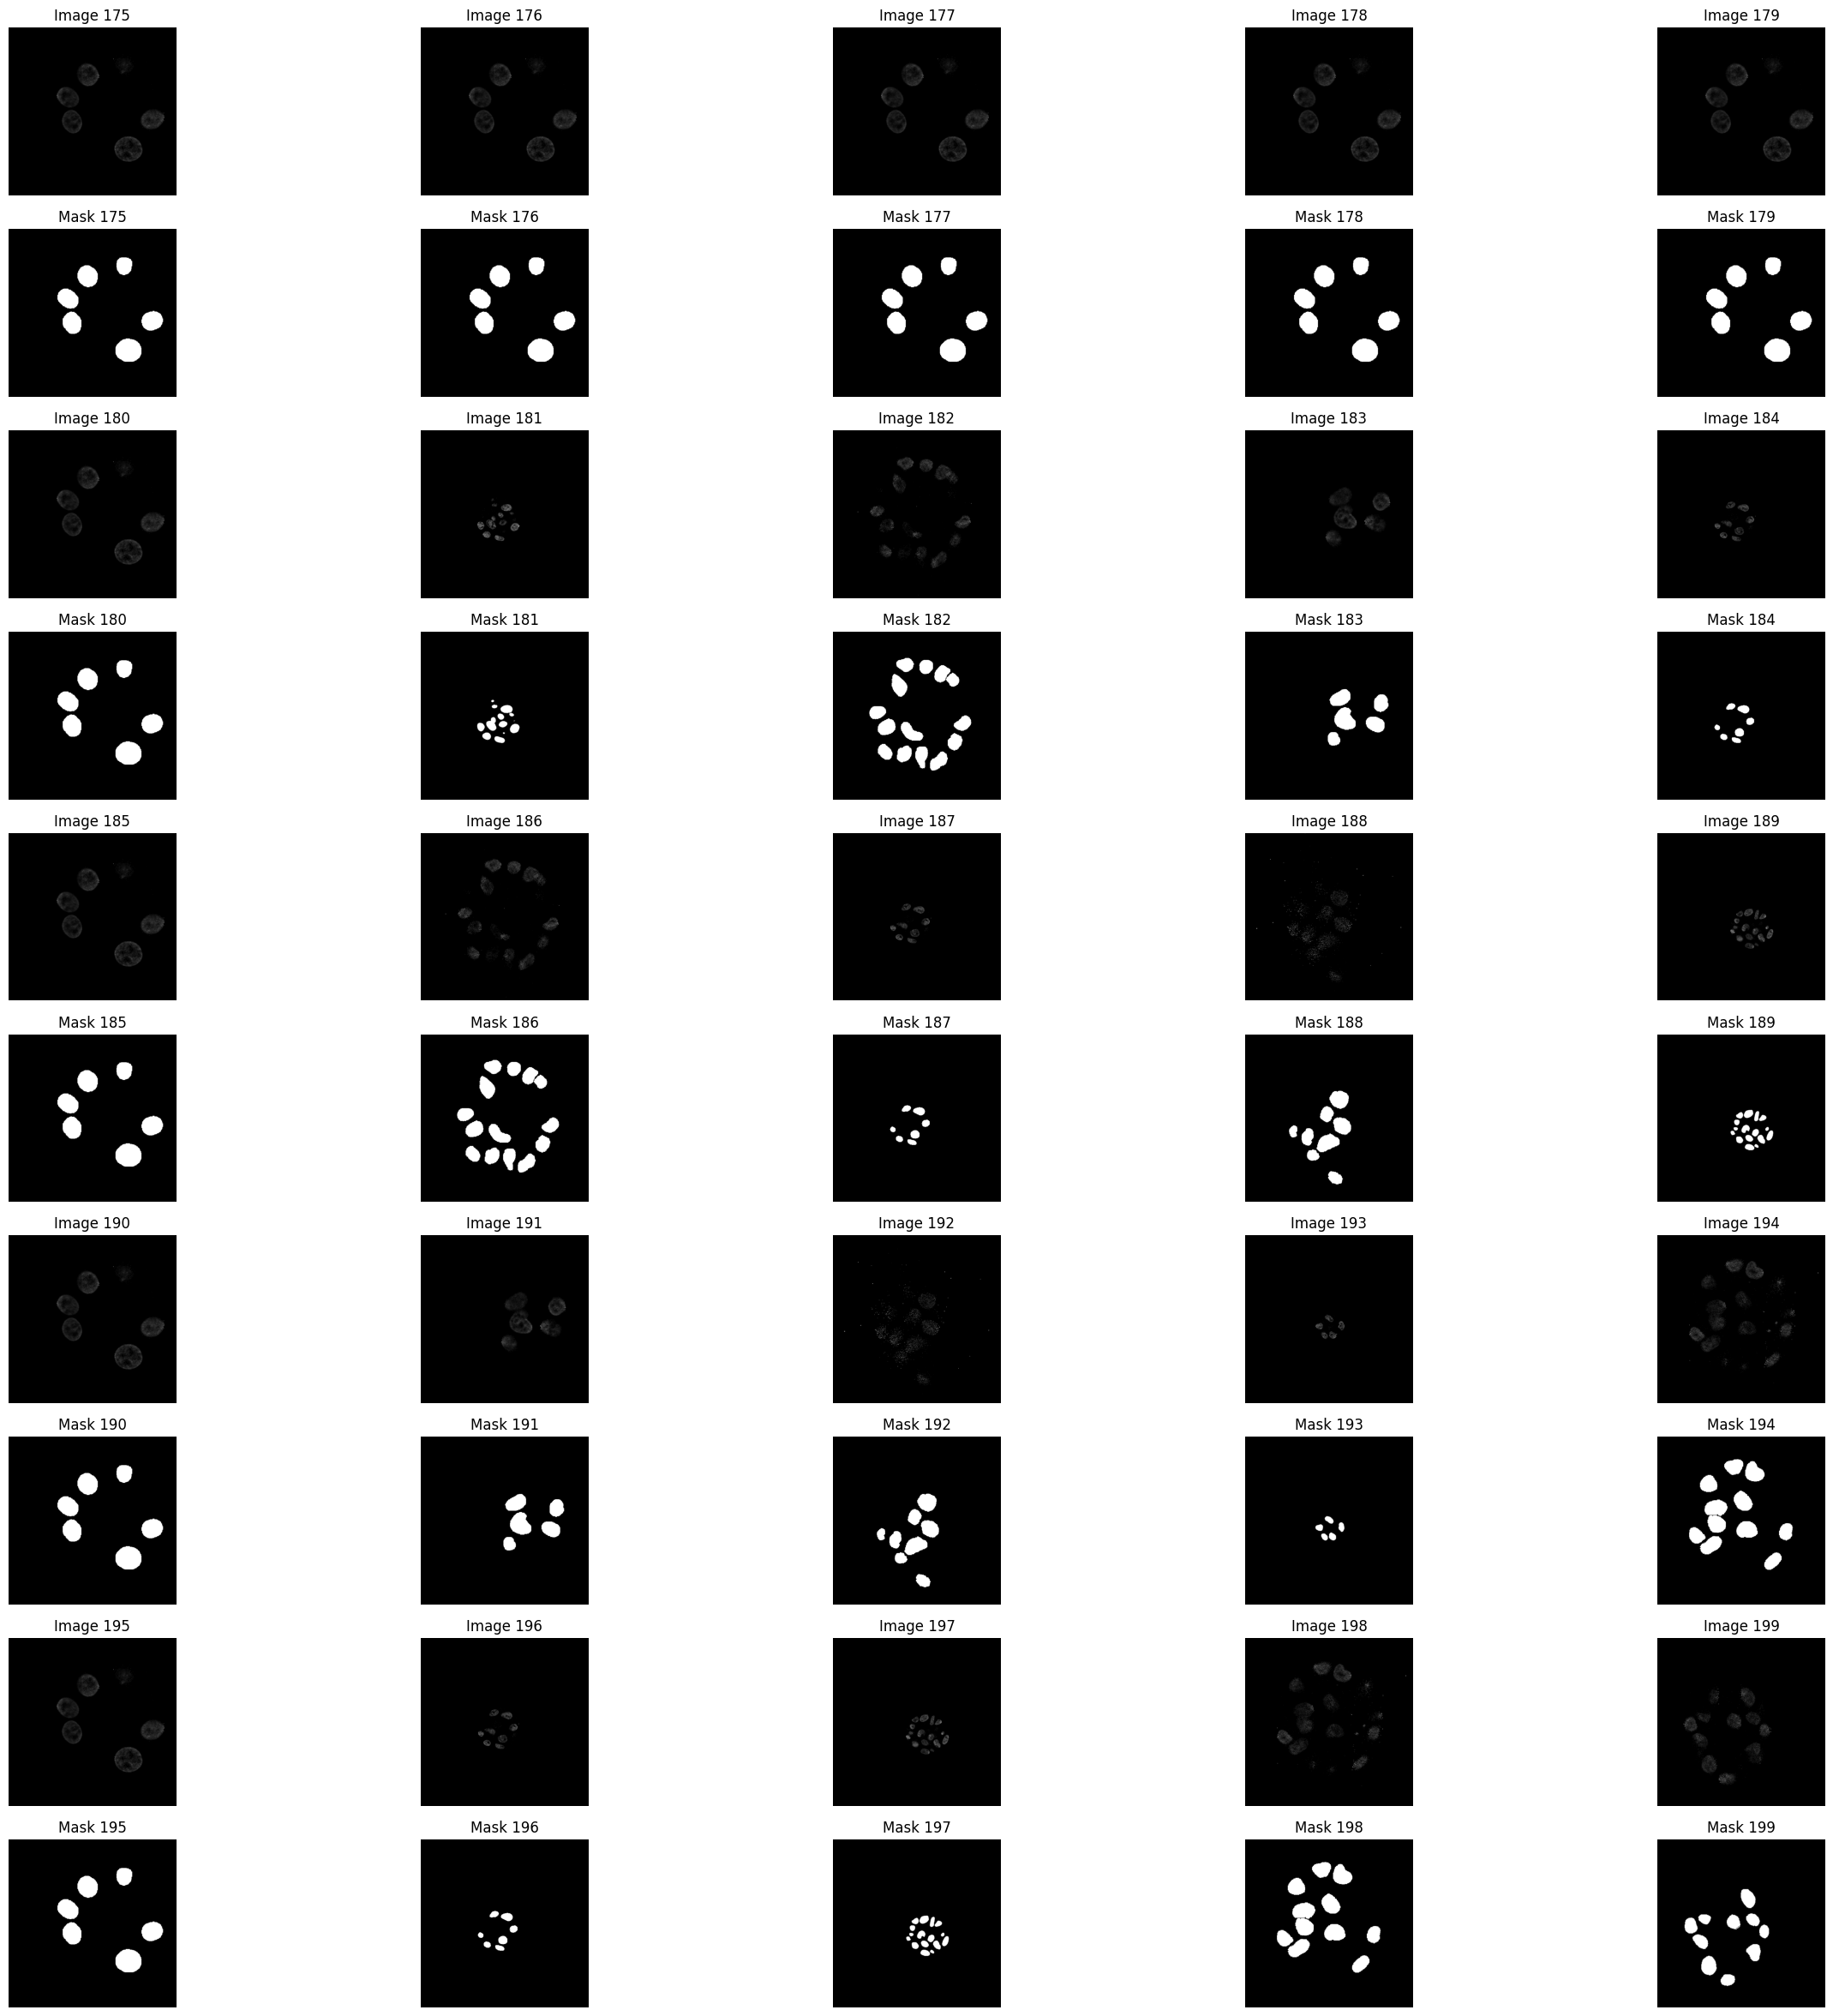

In [ ]:
show_images_batch(X_train, y_train, 7) # 175 - 199

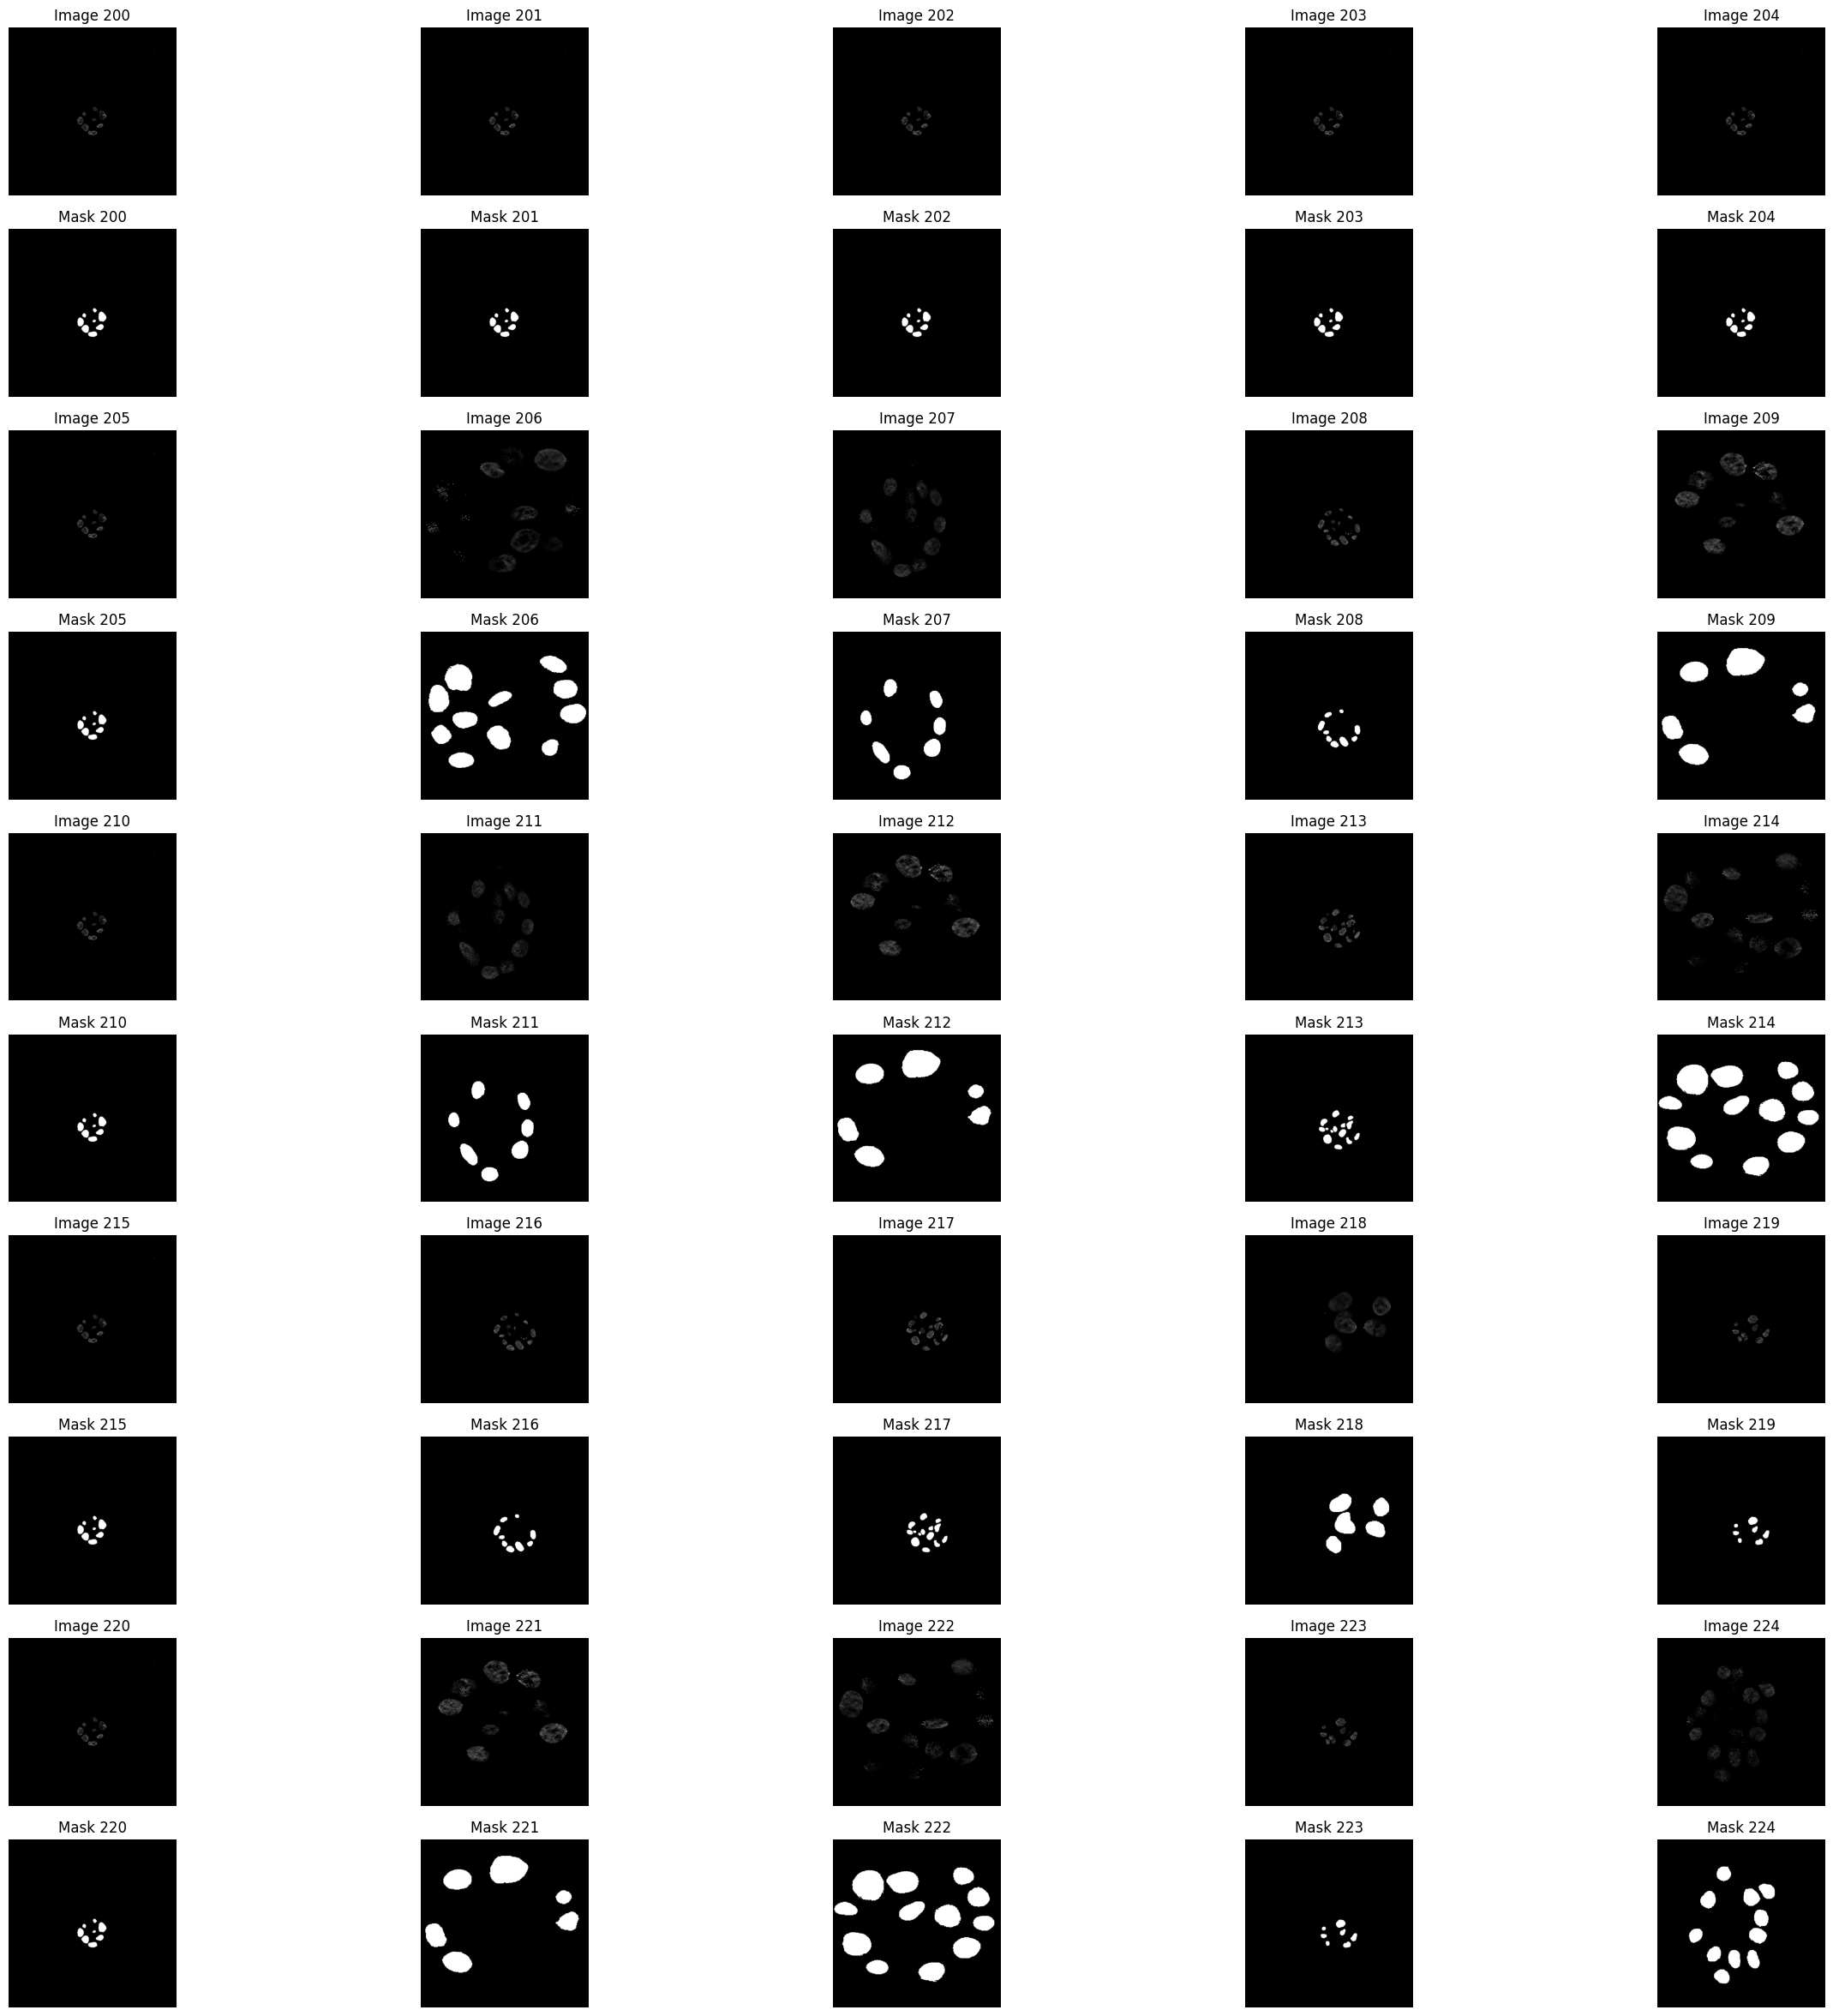

In [ ]:
show_images_batch(X_train, y_train, 8) # 200 - 224

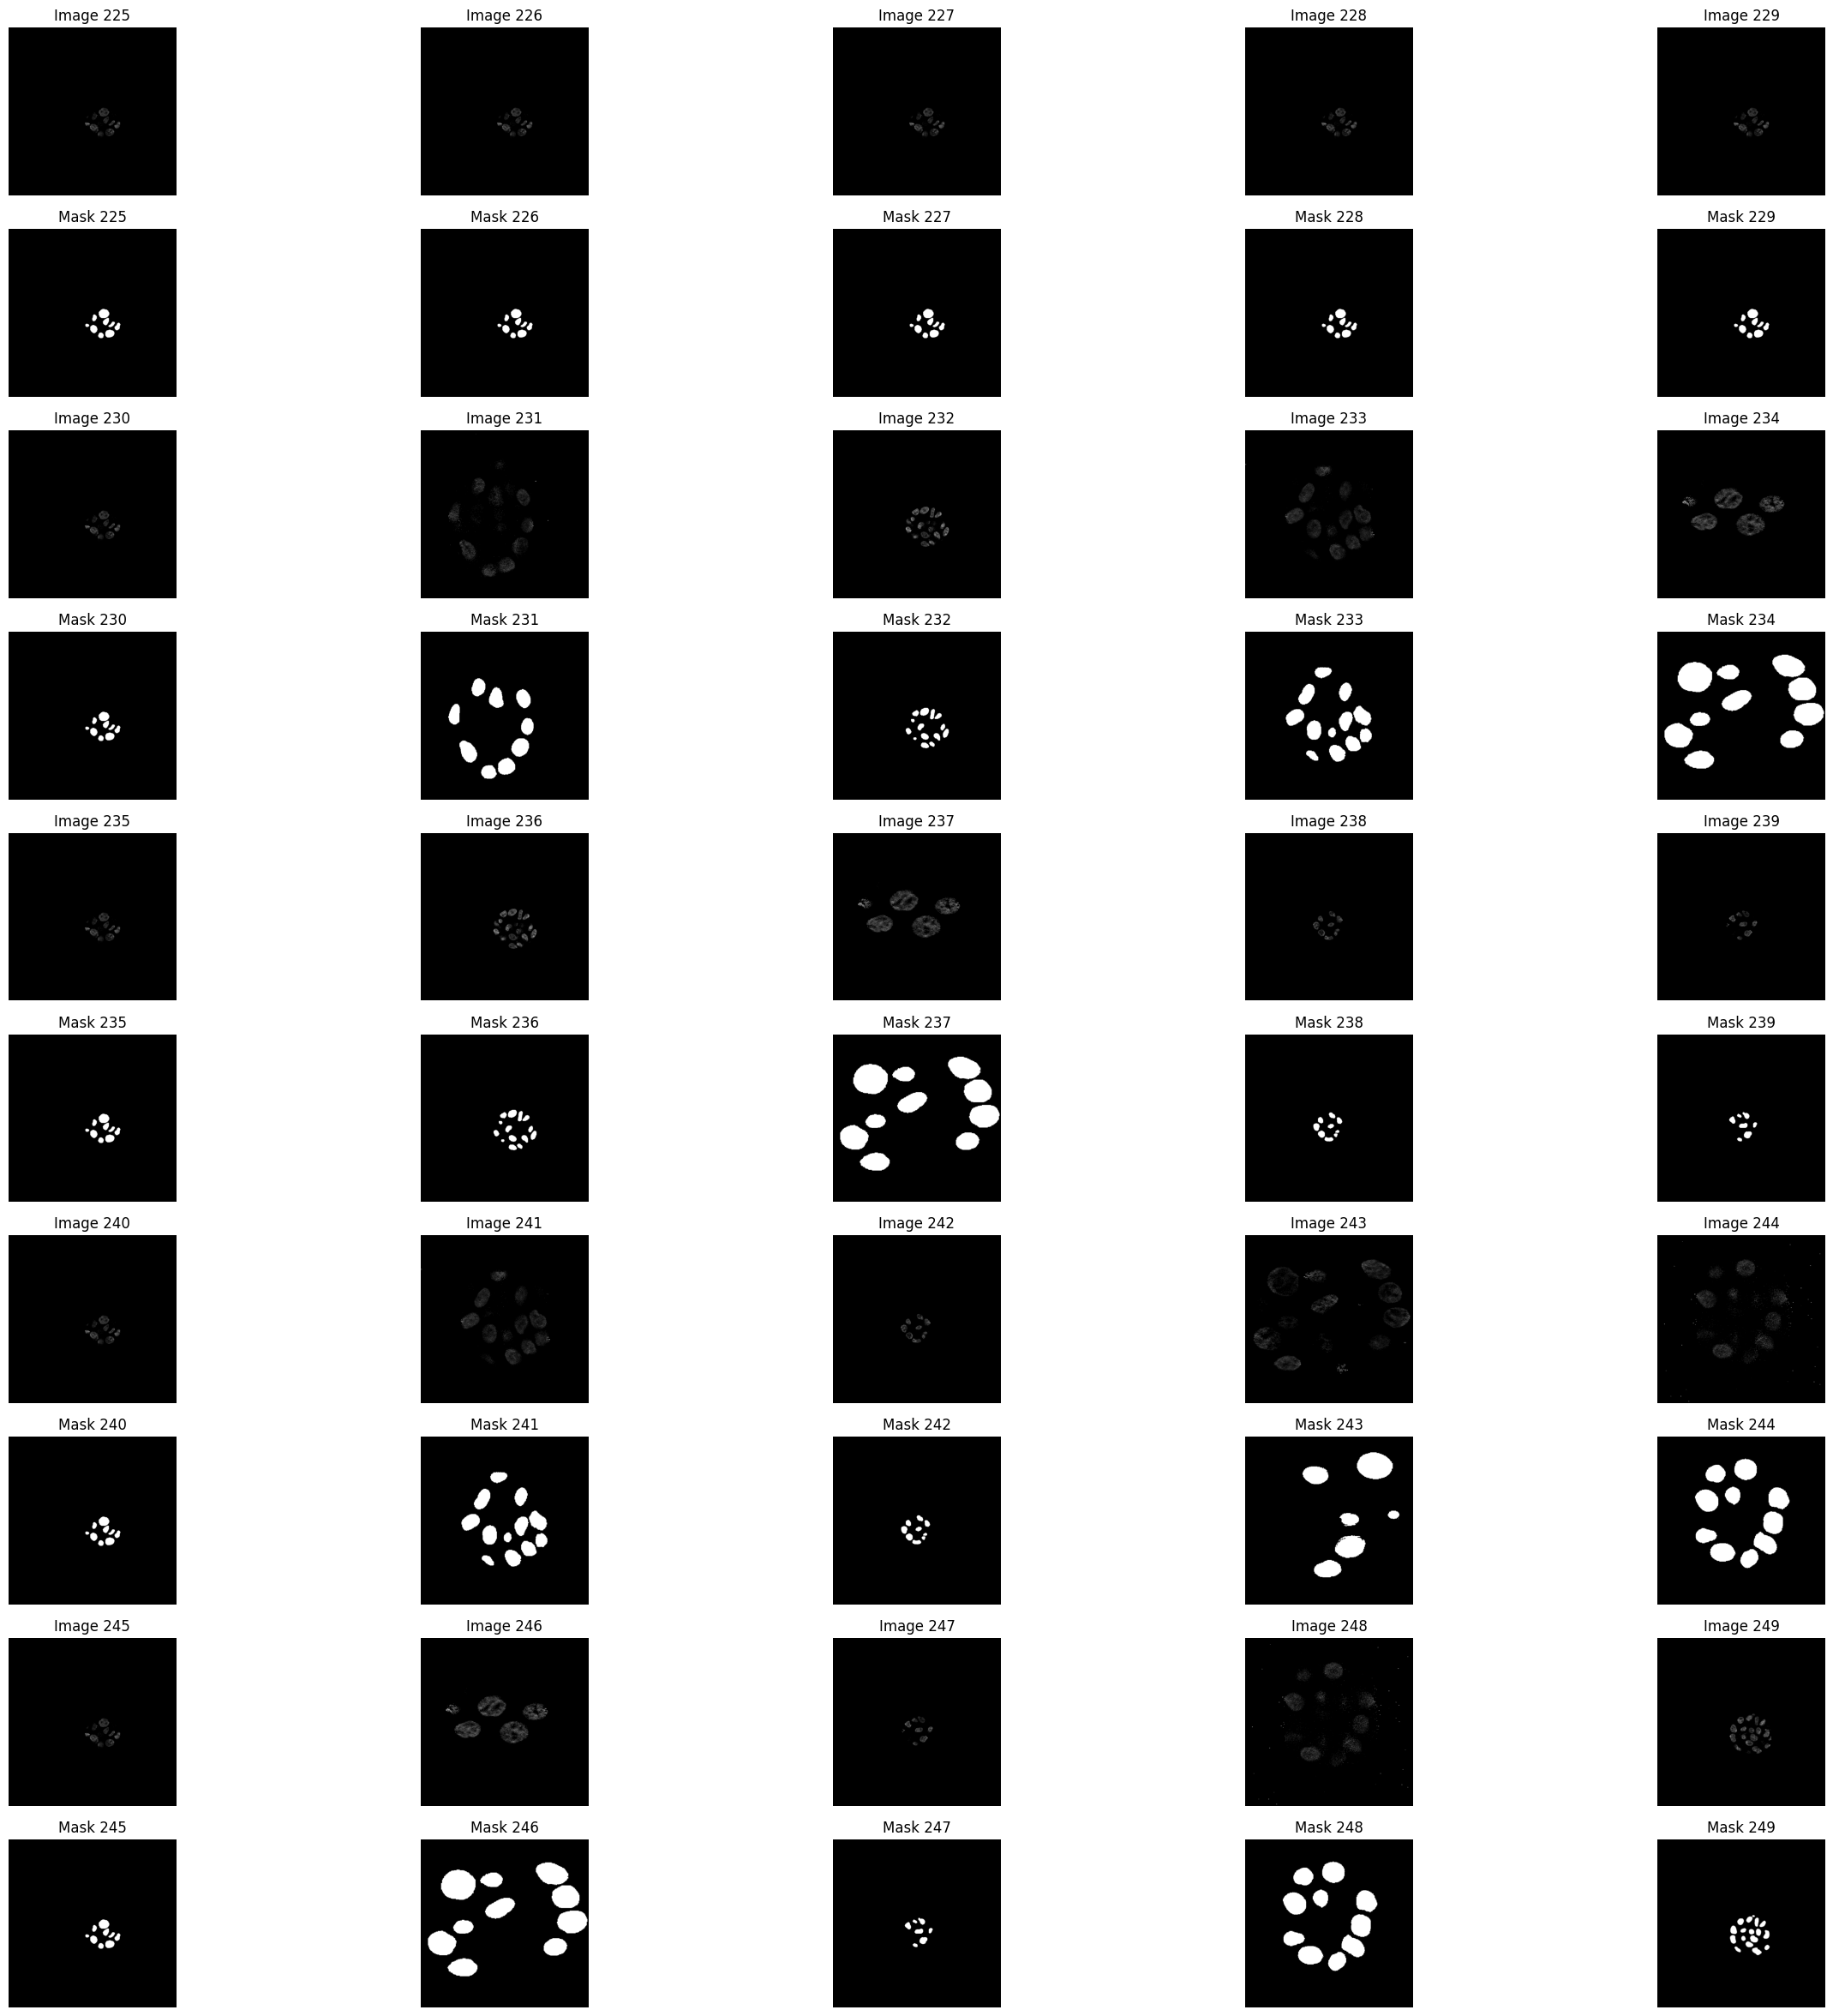

In [ ]:
show_images_batch(X_train, y_train, 9) # 225 - 274 END for training data

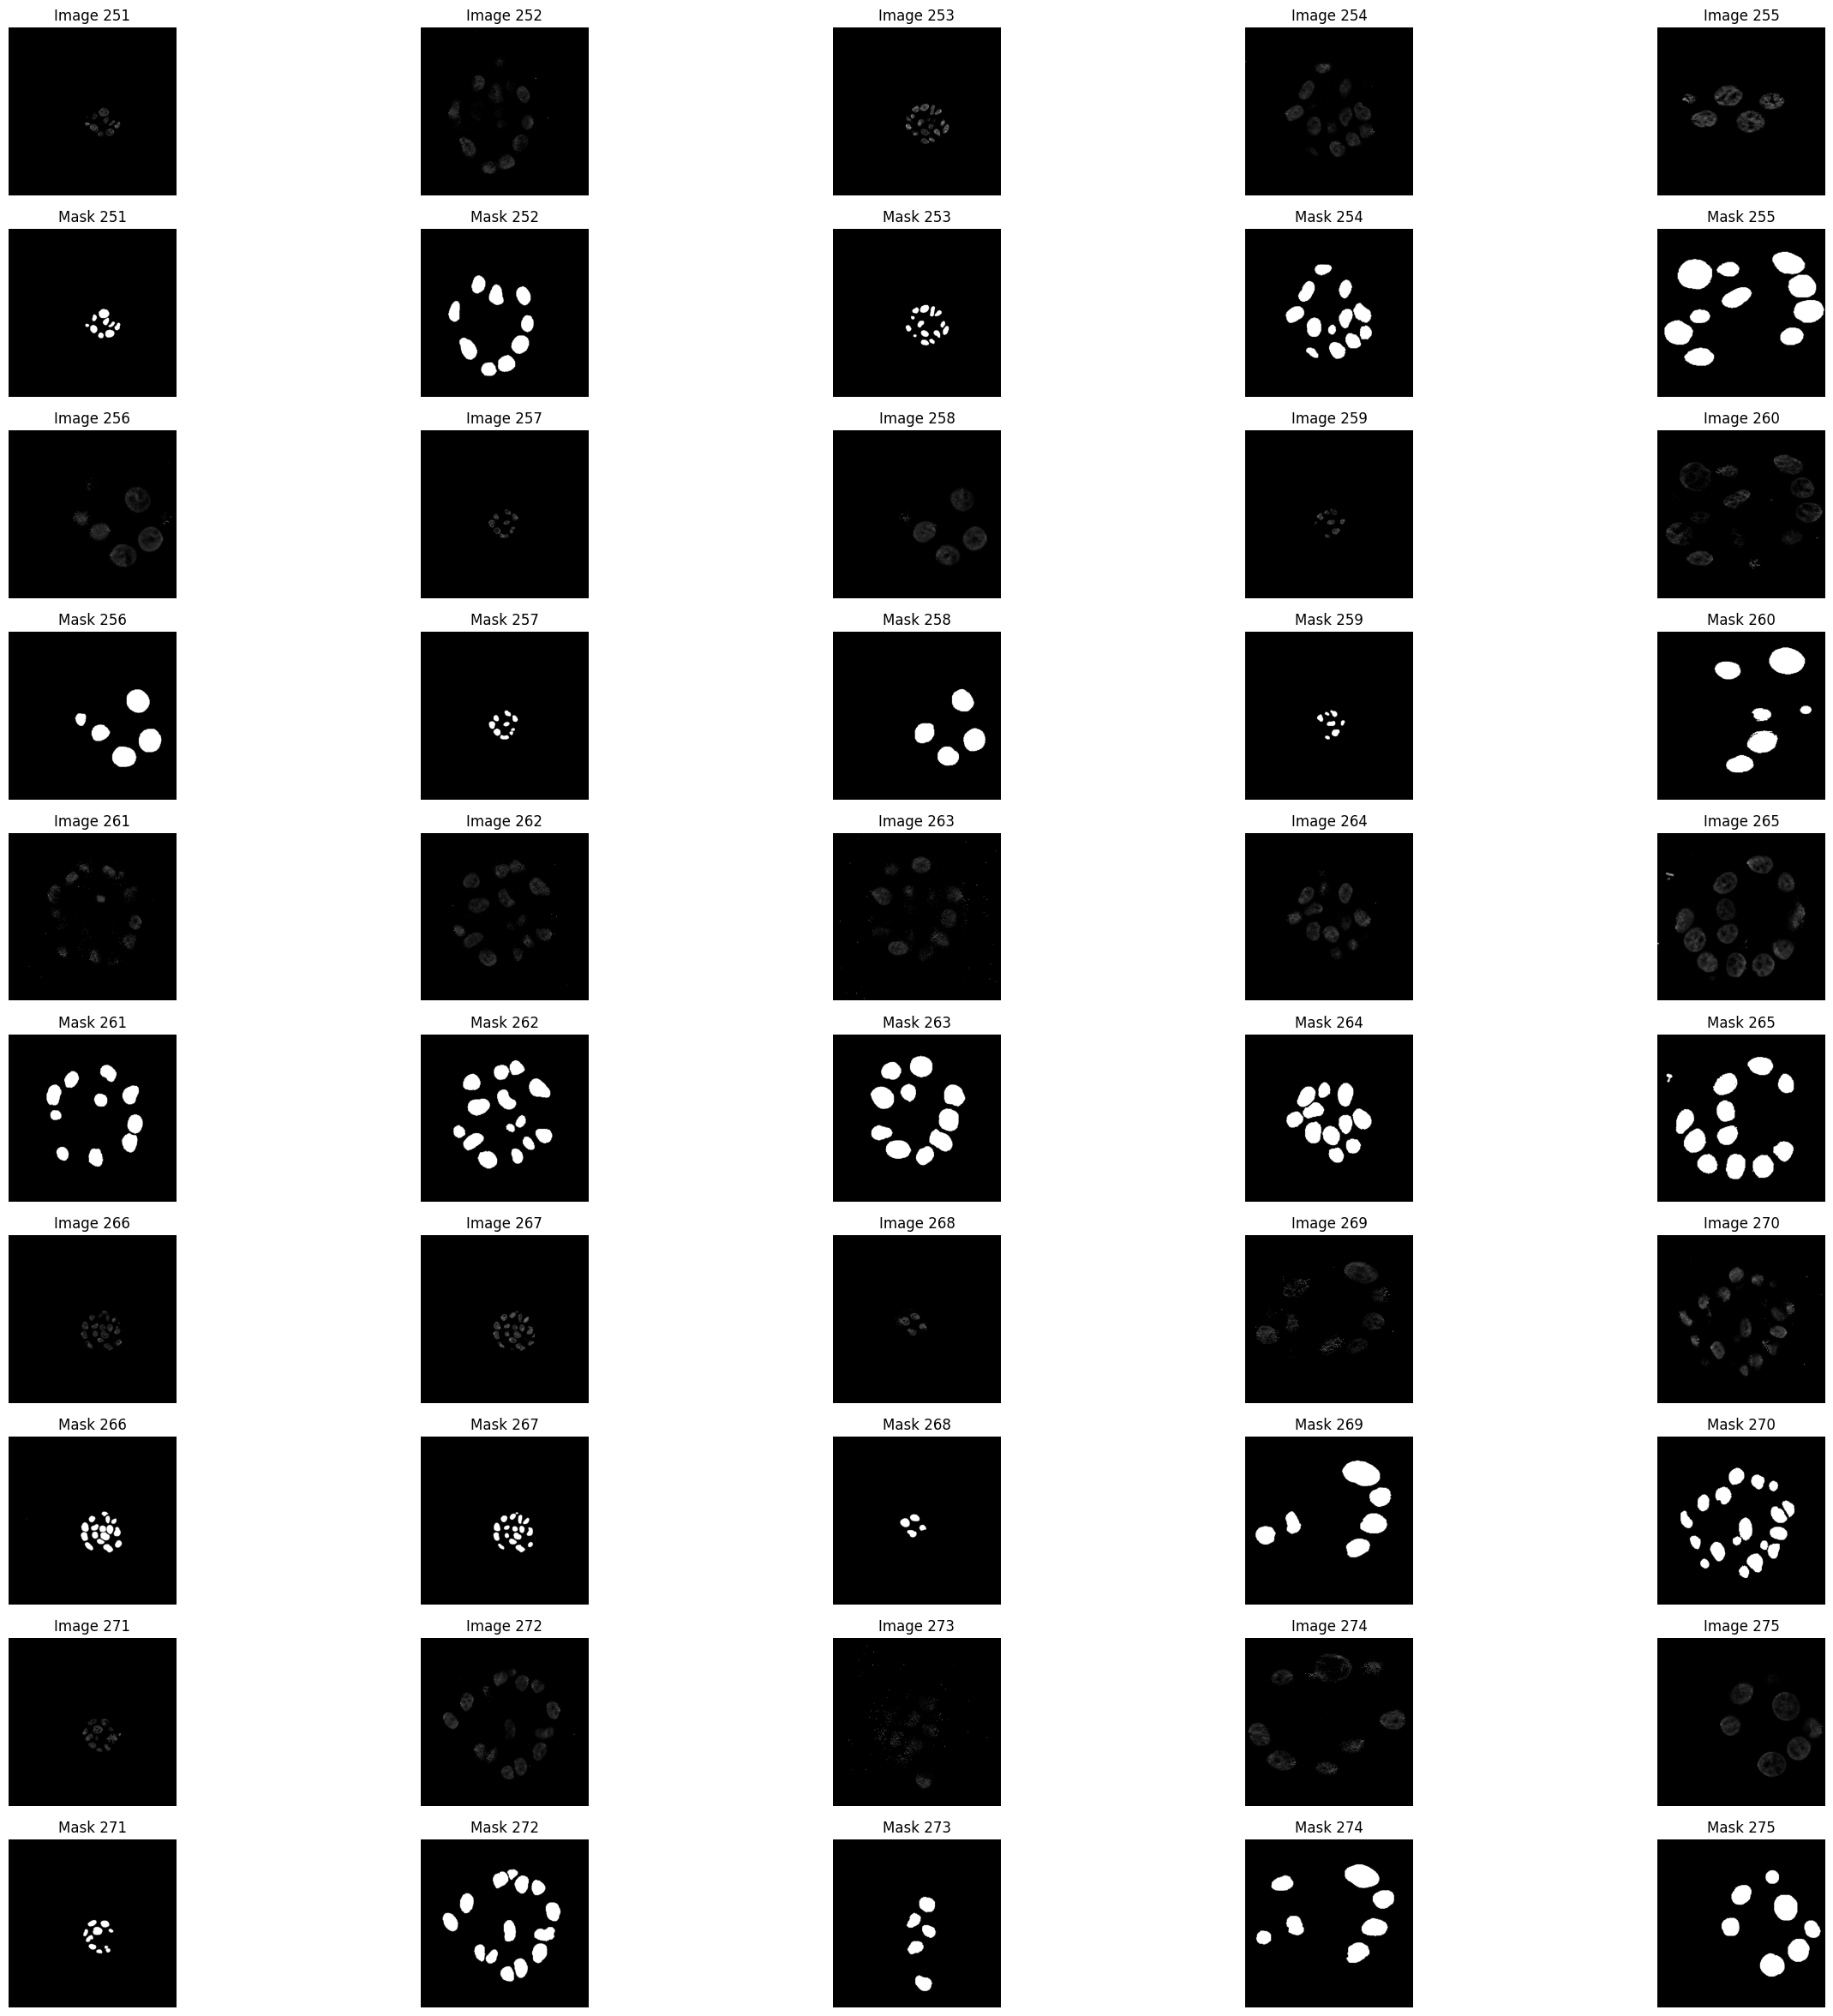

In [ ]:
show_images_batch(X_train, y_train, 10) # 250 - 275

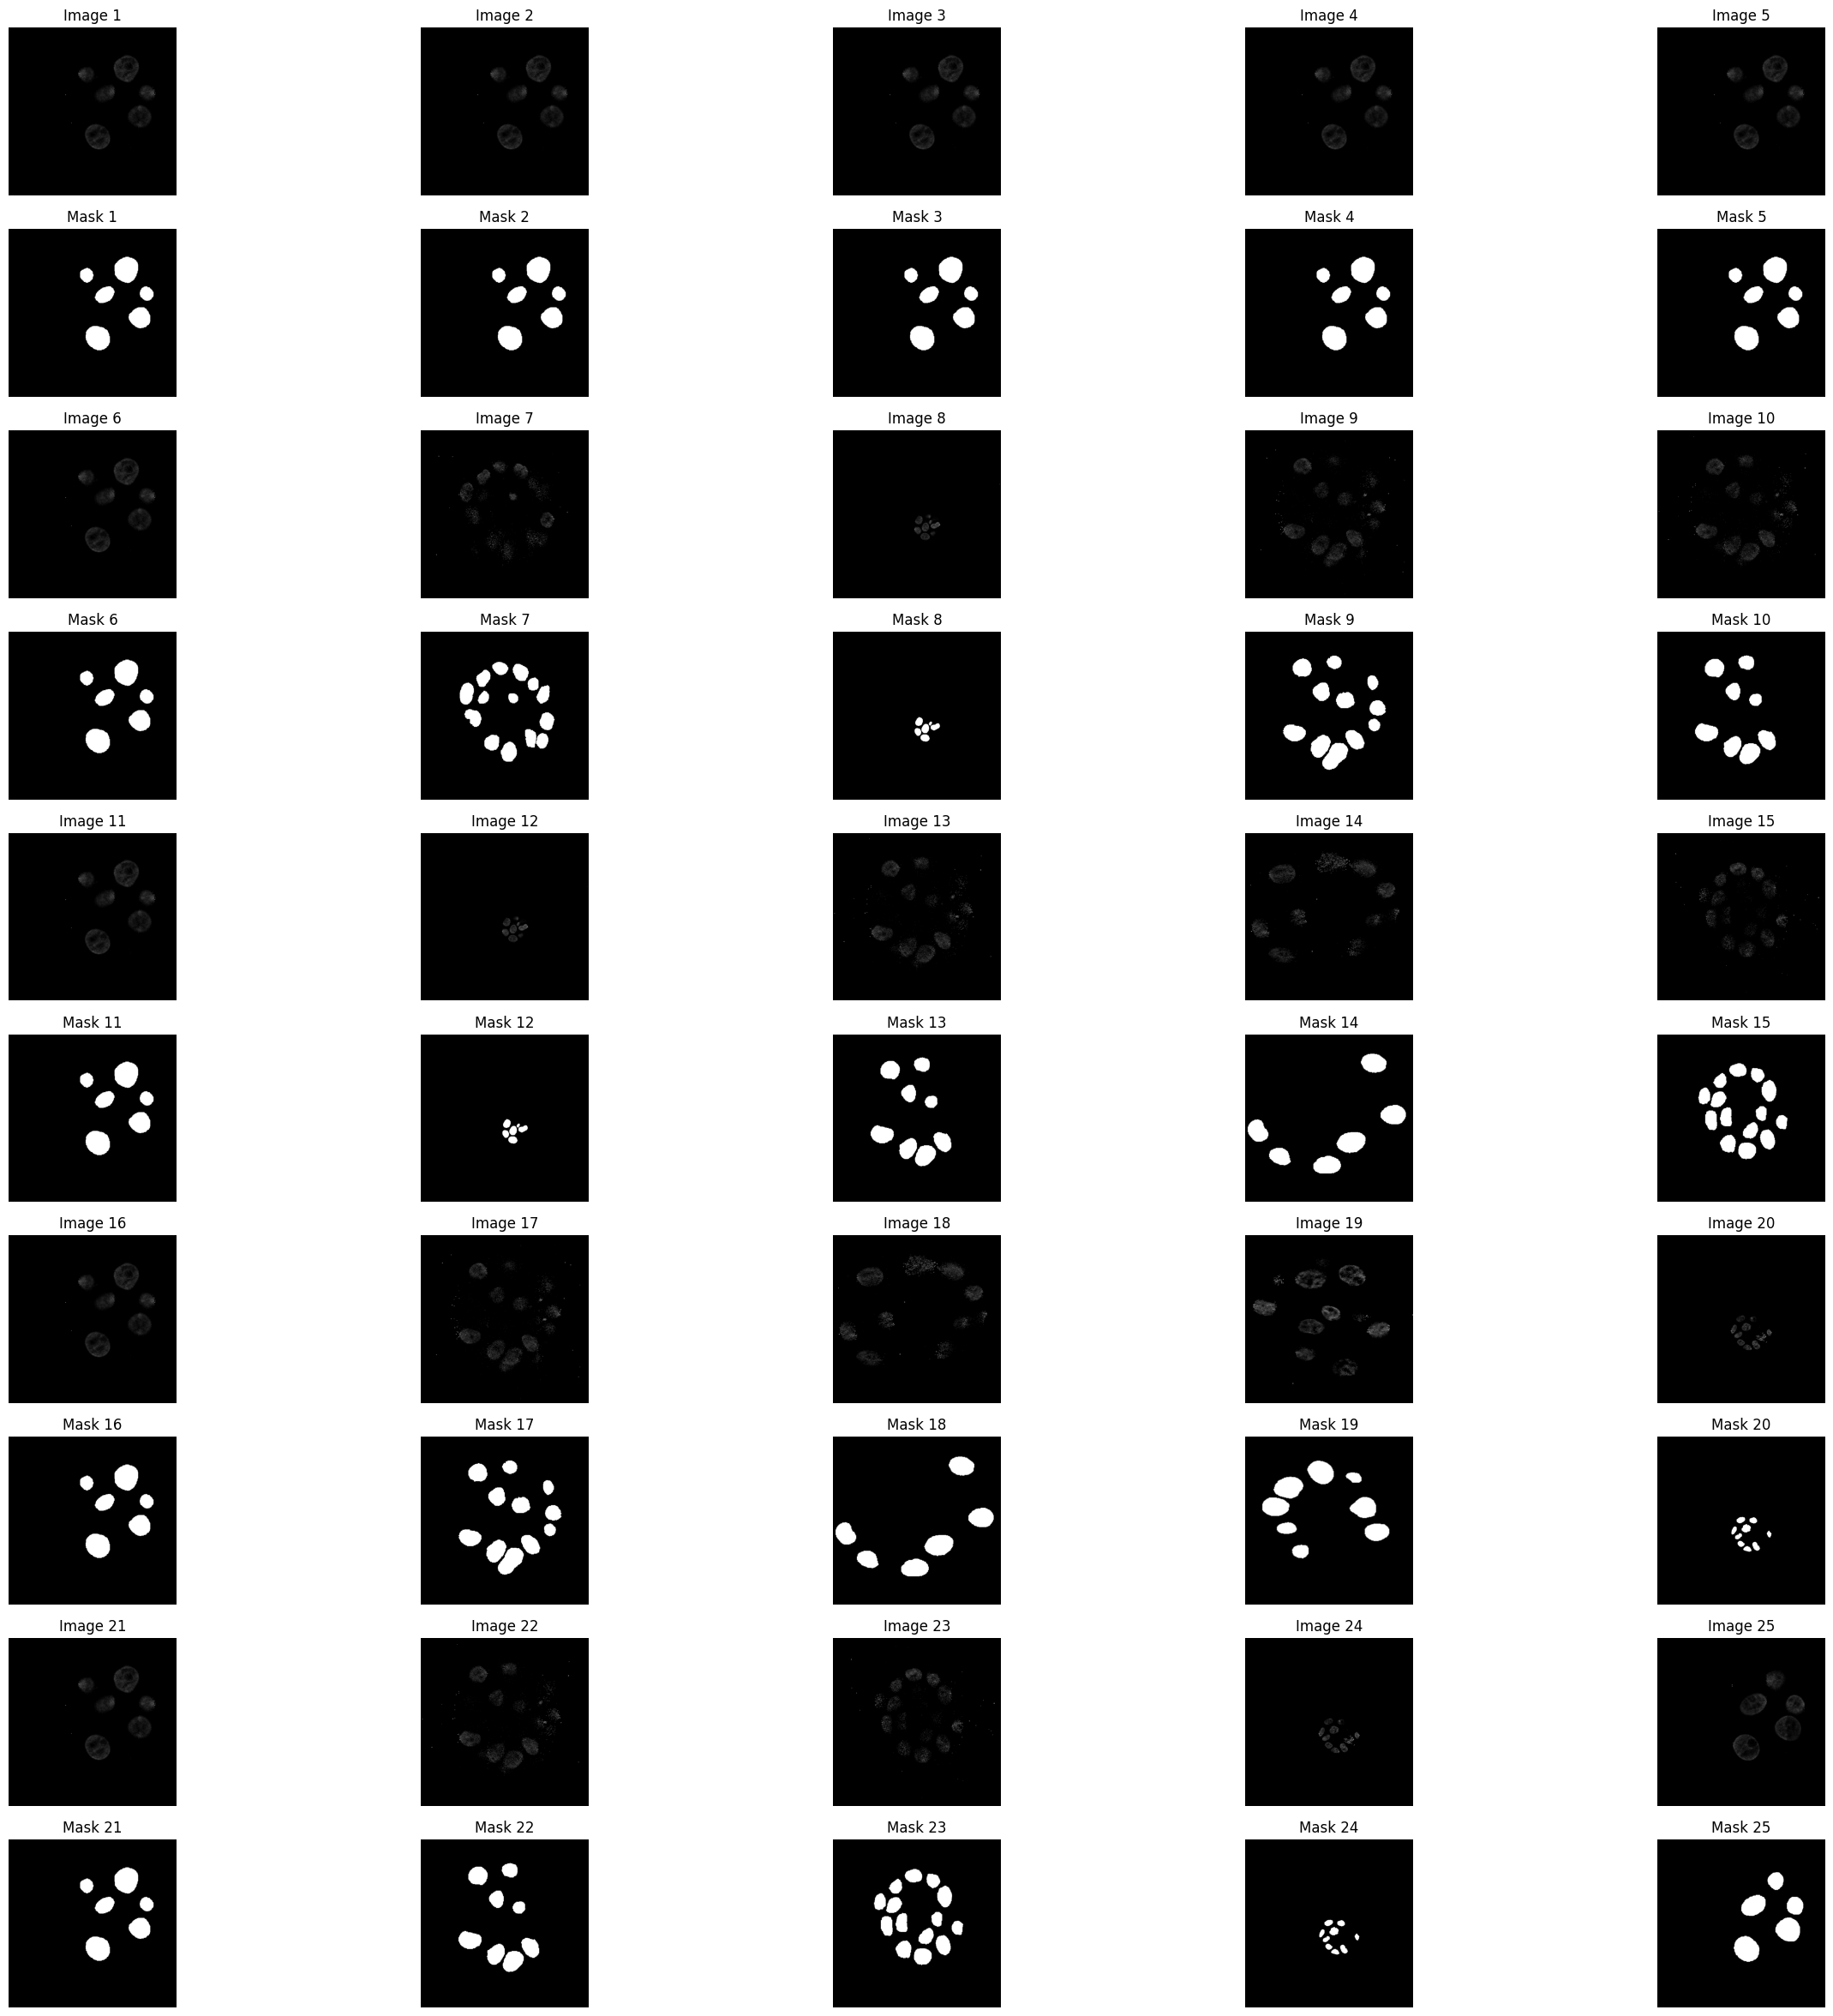

In [ ]:
show_images_batch(X_val, y_val, 0) # 1 - 25

IndexError: ignored

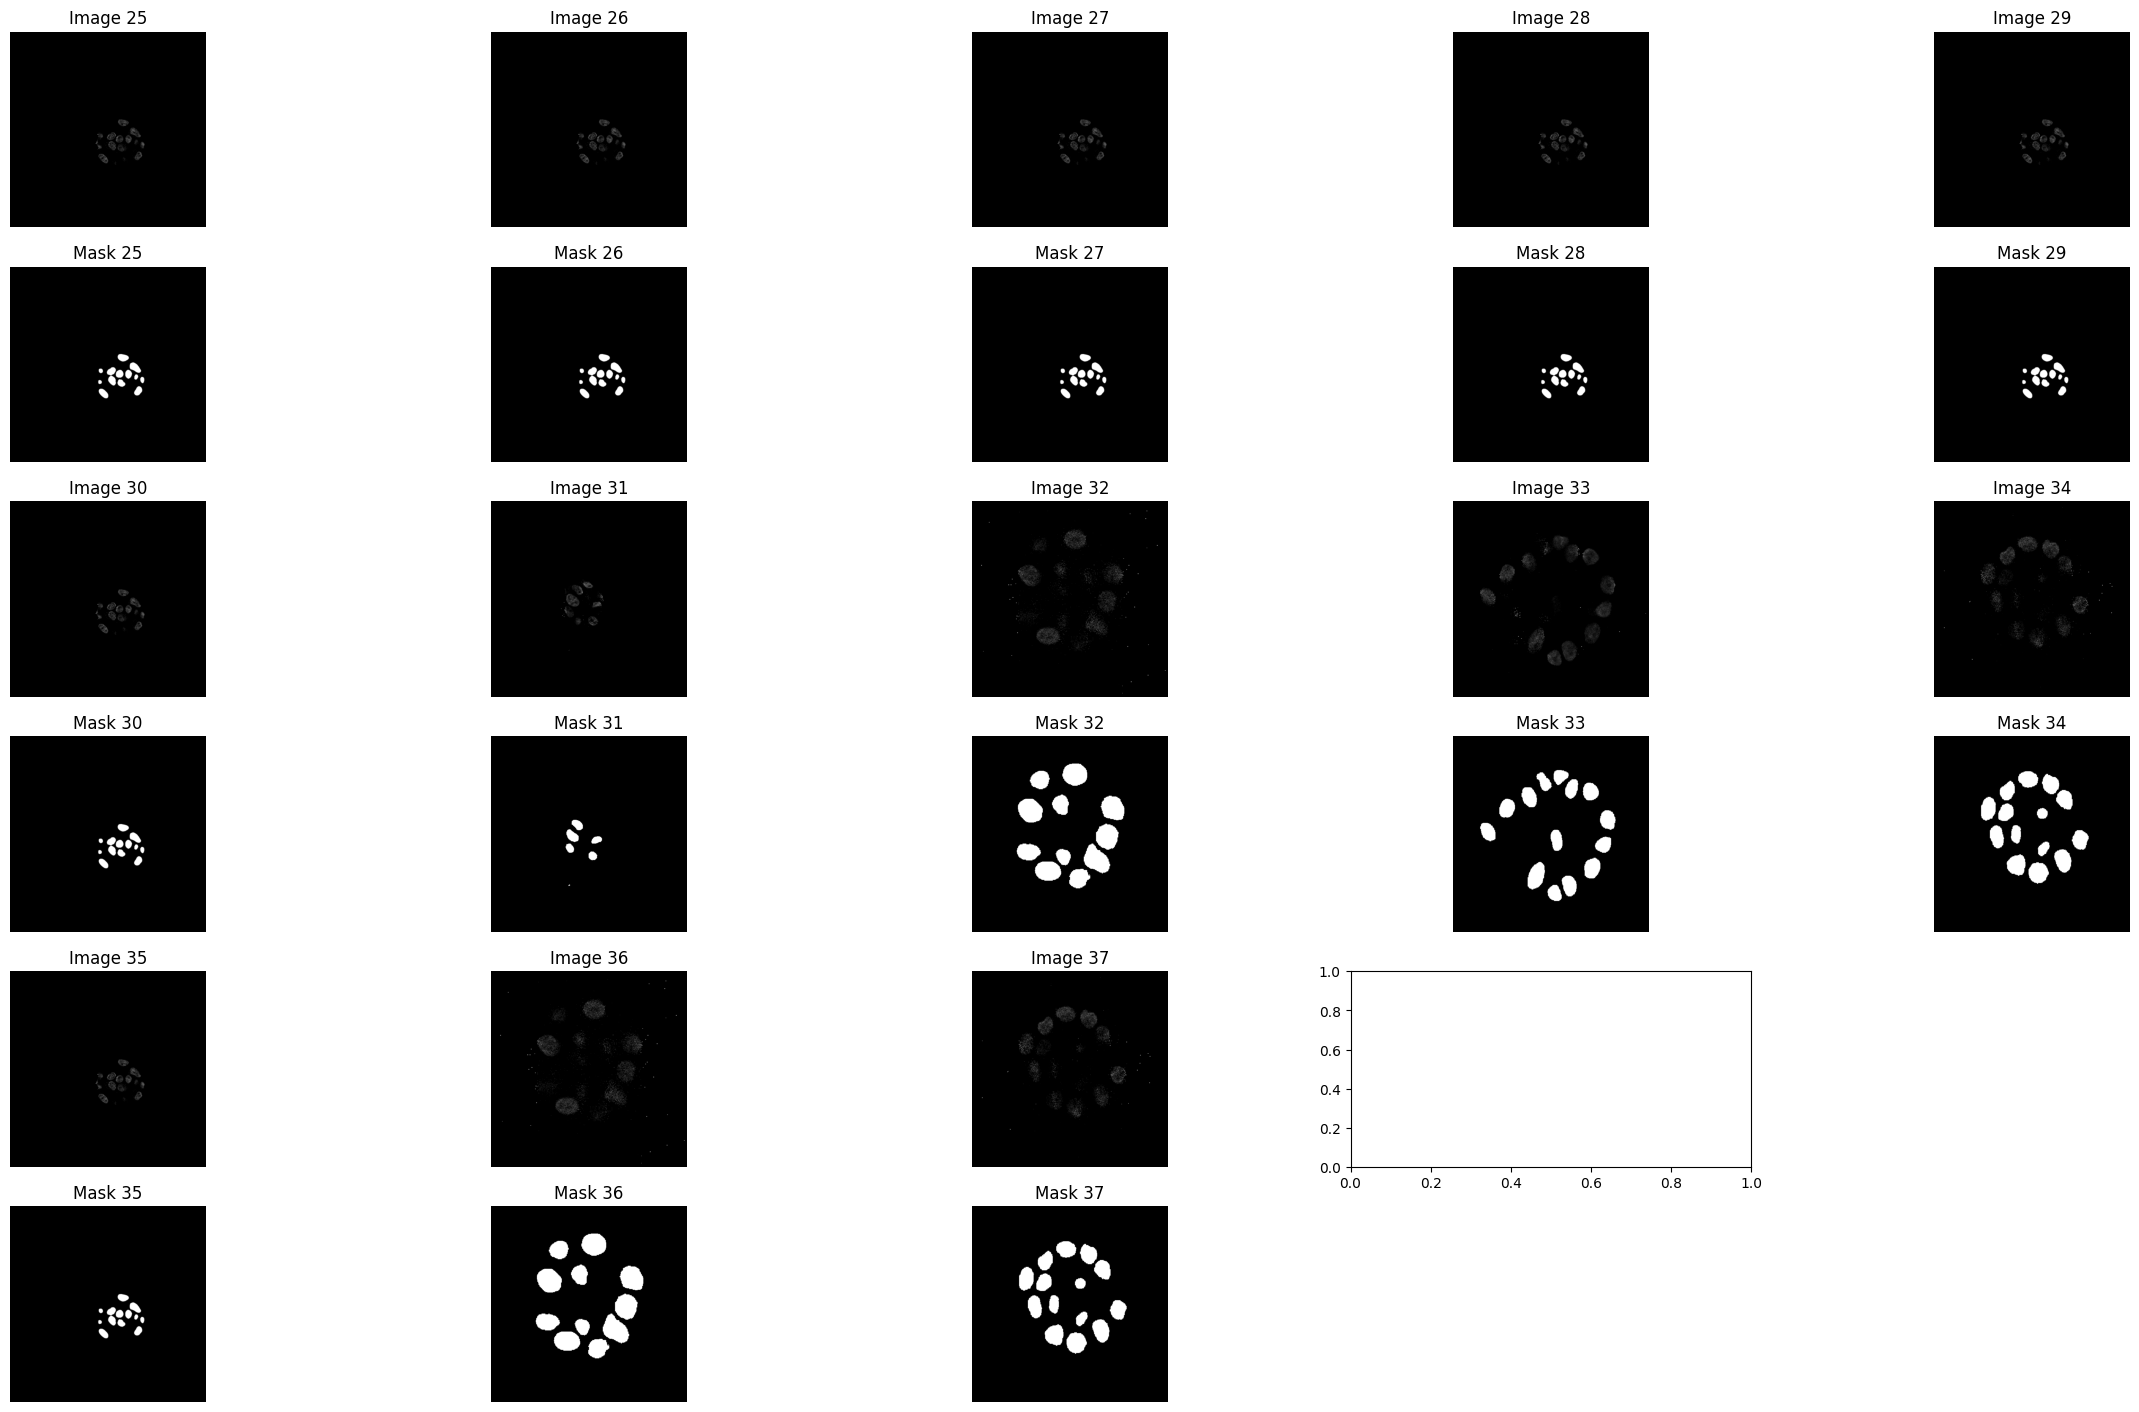

In [ ]:
show_images_batch(X_val, y_val, 1) # 25 to rest

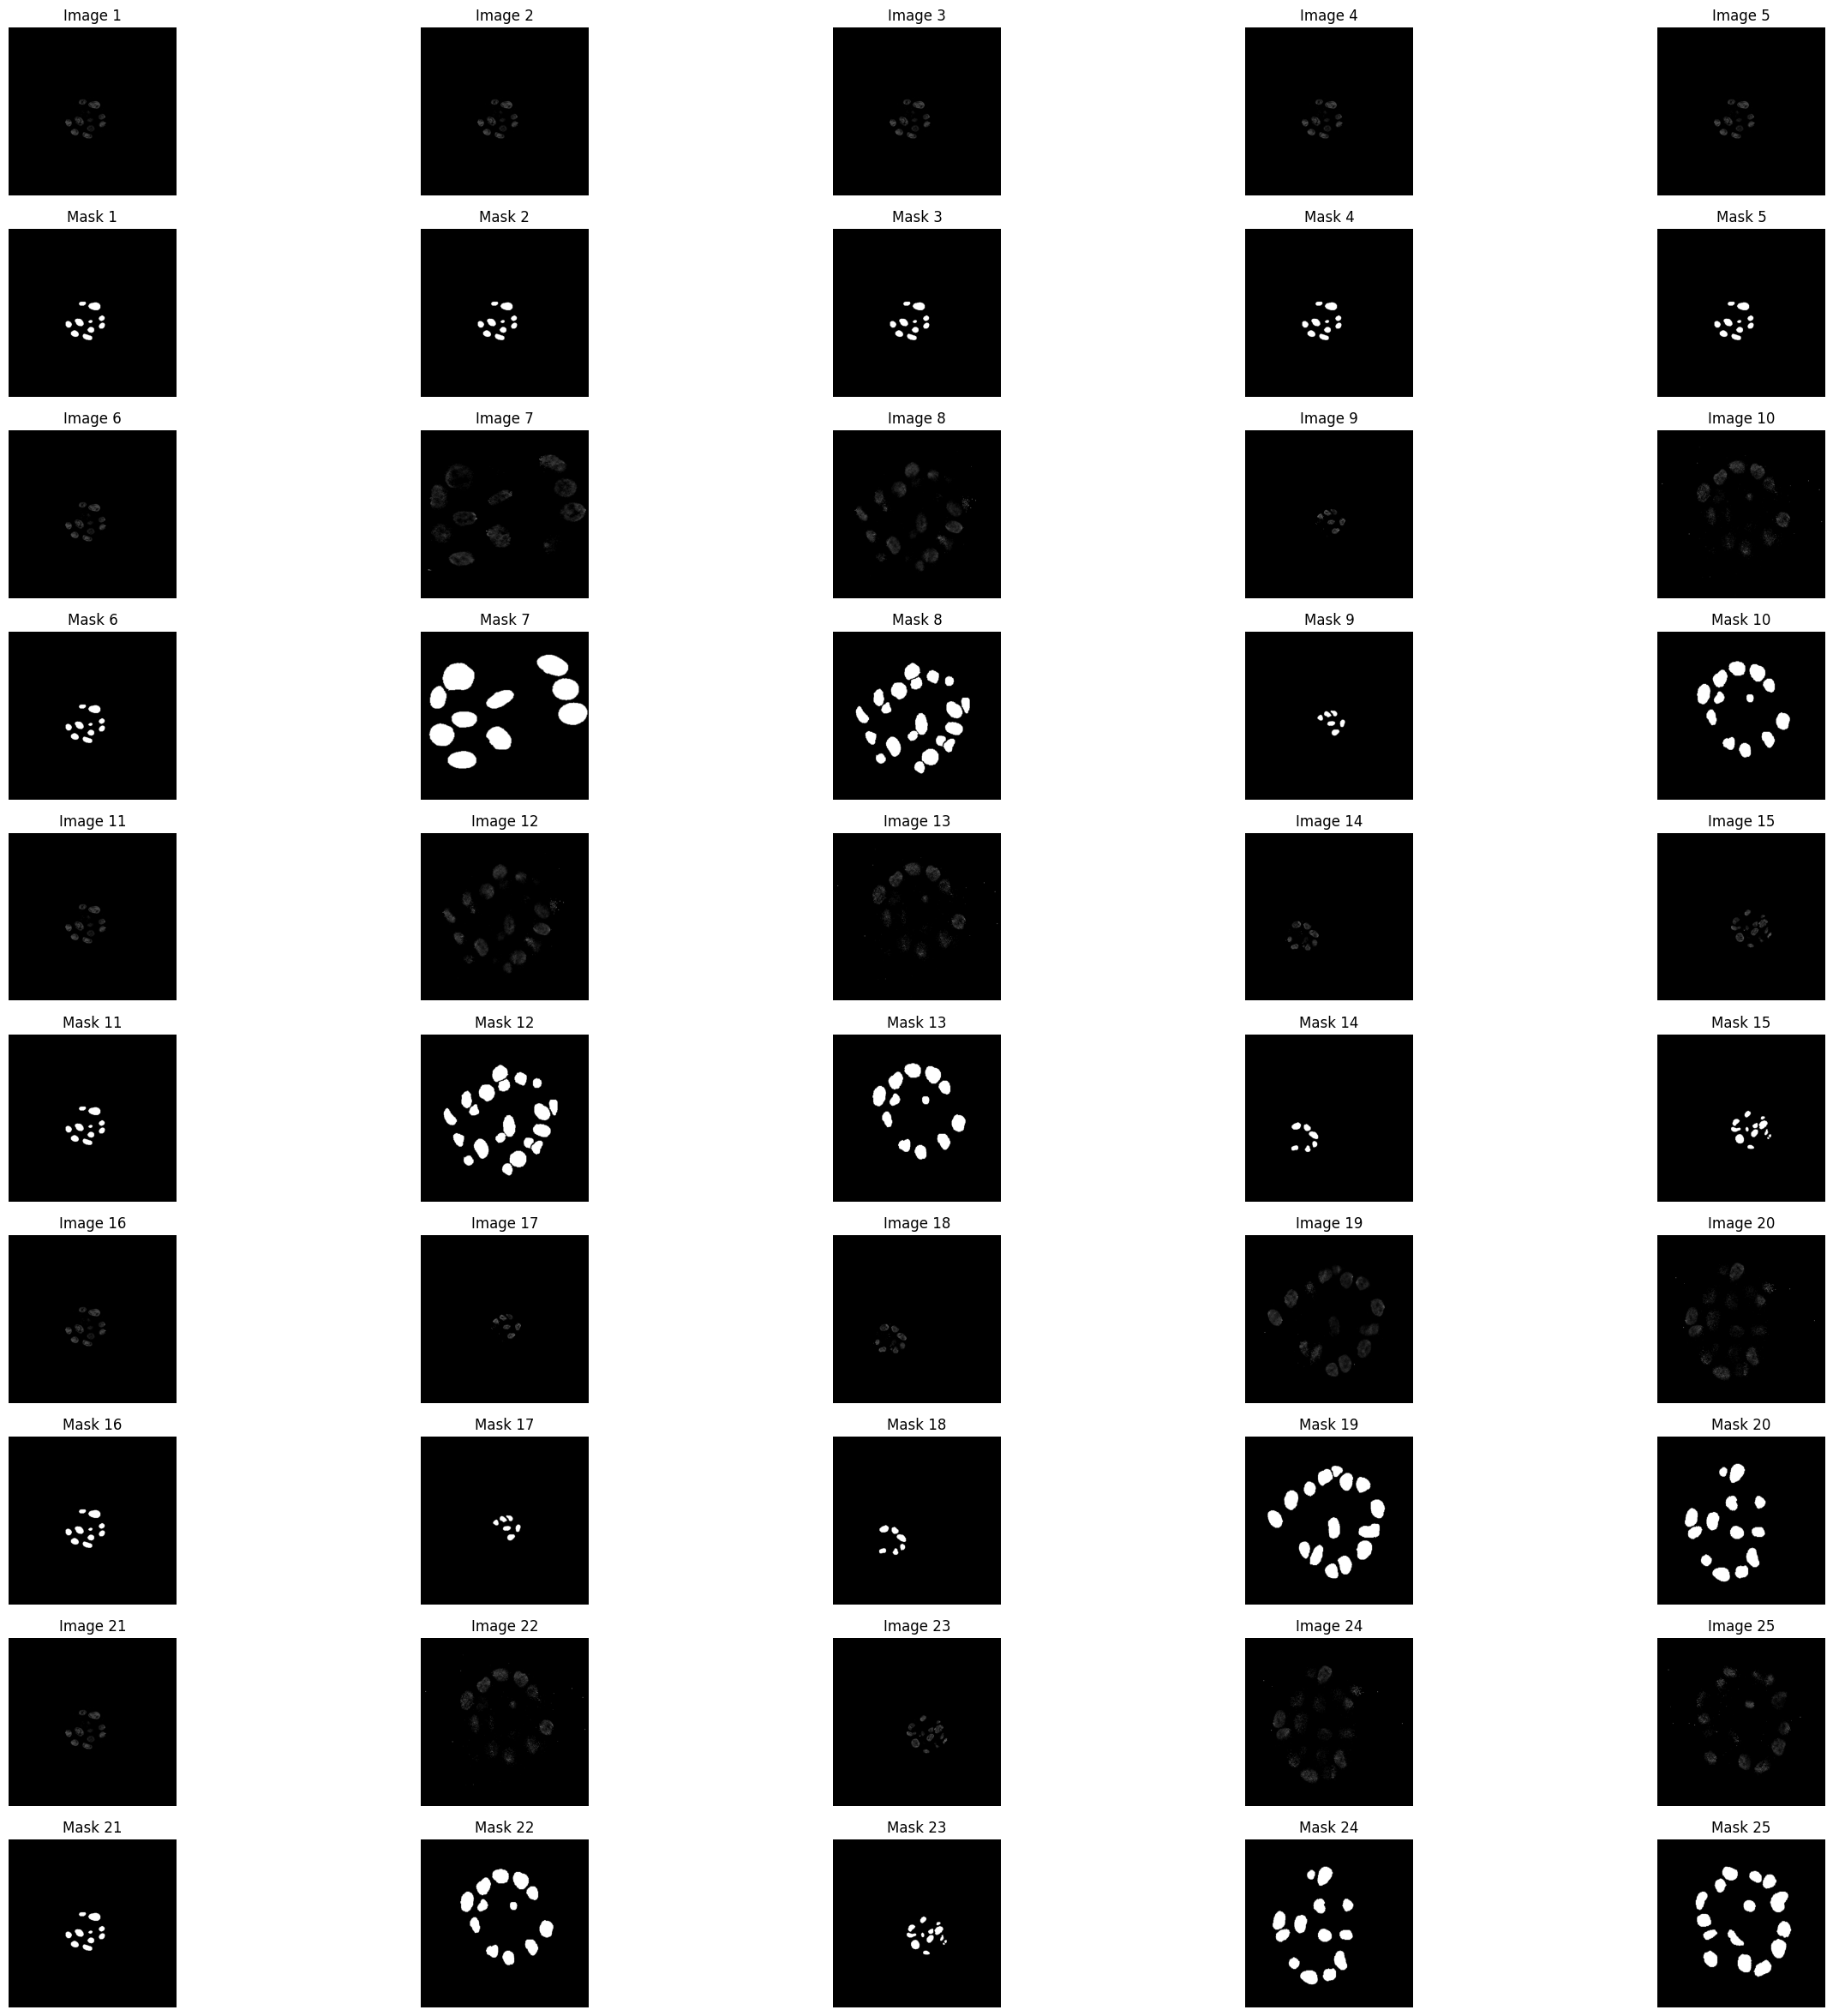

In [ ]:
show_images_batch(X_test, y_test, 0)